In [65]:
library(tidyverse)
library(emmeans)
library(cowplot)
library(car)
library(olsrr)
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
df_eff <- read_csv('effervescence.csv', col_types = 'fffnnn')
df_eff %>% head()
df_eff %>% summary()
df_eff %>% str()

Brand,Temp,Stirred,Order,Time
<fct>,<fct>,<fct>,<dbl>,<dbl>
name,6,yes,8,77.21547
name,23,yes,3,75.37855
name,40,yes,7,68.08492
store,6,yes,1,77.87371
store,23,yes,2,66.38436
store,40,yes,18,59.82388


   Brand    Temp    Stirred      Order            Time      
 name :24   6 :16   yes:24   Min.   : 1.00   Min.   :58.24  
 store:24   23:16   no :24   1st Qu.:12.75   1st Qu.:66.09  
            40:16            Median :24.50   Median :70.92  
                             Mean   :24.50   Mean   :70.77  
                             3rd Qu.:36.25   3rd Qu.:76.93  
                             Max.   :48.00   Max.   :80.92  

spec_tbl_df [48 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Brand  : Factor w/ 2 levels "name","store": 1 1 1 2 2 2 1 1 1 2 ...
 $ Temp   : Factor w/ 3 levels "6","23","40": 1 2 3 1 2 3 1 2 3 1 ...
 $ Stirred: Factor w/ 2 levels "yes","no": 1 1 1 1 1 1 1 1 1 1 ...
 $ Order  : num [1:48] 8 3 7 1 2 18 9 4 10 12 ...
 $ Time   : num [1:48] 77.2 75.4 68.1 77.9 66.4 ...
 - attr(*, "spec")=
  .. cols(
  ..   Brand = col_factor(levels = NULL, ordered = FALSE, include_na = FALSE),
  ..   Temp = col_factor(levels = NULL, ordered = FALSE, include_na = FALSE),
  ..   Stirred = col_factor(levels = NULL, ordered = FALSE, include_na = FALSE),
  ..   Order = col_number(),
  ..   Time = col_number()
  .. )
 - attr(*, "problems")=<externalptr> 


### Description of data
In this data set, we have 48 rows and 6 columns. The 6 columns include 3 explanatory variables (Brand, Temp, Stirred categorical factors), 2 response variables (Time and Org Time, both numerical) and 1 descriptor (sample order).  

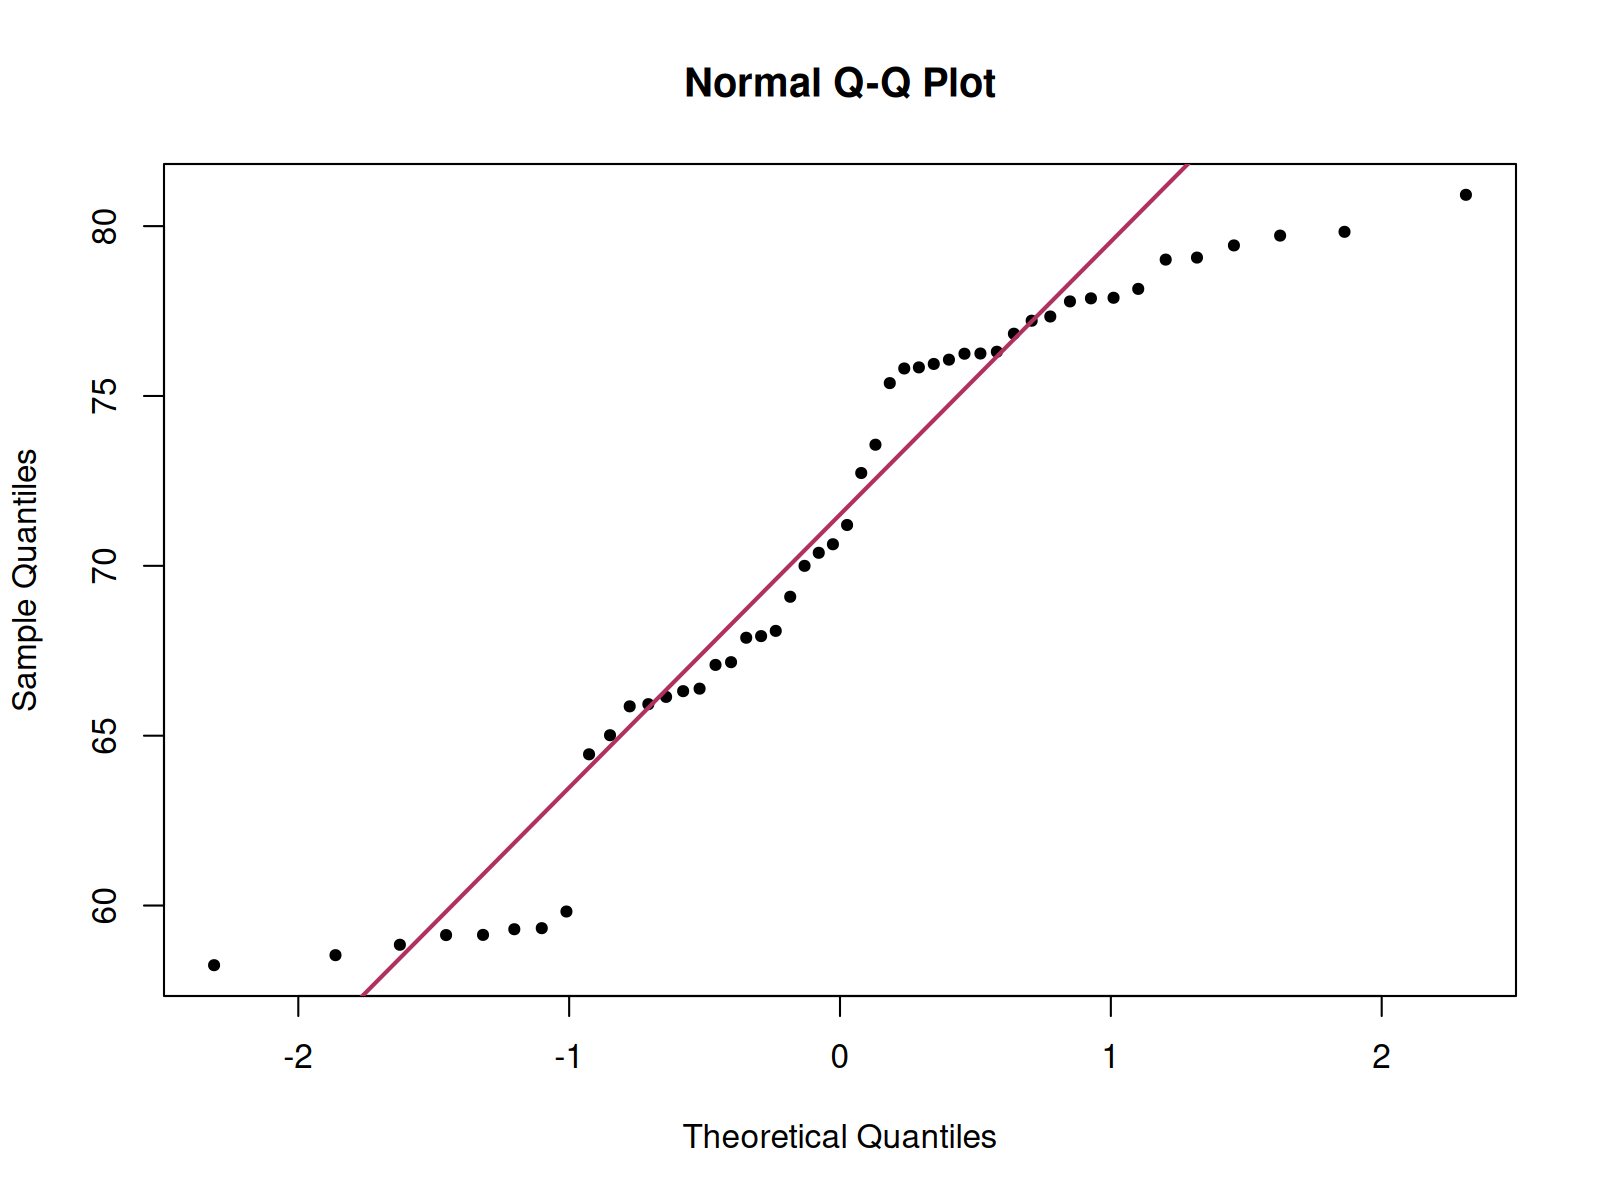

In [3]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 200)
qqnorm(df_eff$Time, pch = 20)
qqline(df_eff$Time, col = "maroon", lwd = 2)

### Normality of the Data

A number of analyses assume that the data in question follows a normal distribution. To check for this a QQ plot is created and as can be seen there is some deviation from normality. To confirm this a Shapiro Wilk Test is conducted:

In [4]:
shapiro.test(df_eff$Time)


	Shapiro-Wilk normality test

data:  df_eff$Time
W = 0.90967, p-value = 0.00131


The low p value indicates that the data is not normal. 

In [5]:
df1 <- df_eff %>% filter(Temp == '6')
shapiro.test(df1$Time)

df2 <- df_eff %>% filter(Temp == '23')
shapiro.test(df2$Time)

df3 <- df_eff %>% filter(Temp == '40')
shapiro.test(df3$Time)

df4 <- df_eff %>% filter(Brand == 'store')
shapiro.test(df4$Time)

df5 <- df_eff %>% filter(Brand == 'name')
shapiro.test(df5$Time)

df6 <- df_eff %>% filter(Stirred == 'no')
shapiro.test(df6$Time)

df7 <- df_eff %>% filter(Stirred == 'yes')
shapiro.test(df7$Time)


	Shapiro-Wilk normality test

data:  df1$Time
W = 0.94934, p-value = 0.4793



	Shapiro-Wilk normality test

data:  df2$Time
W = 0.82266, p-value = 0.005535



	Shapiro-Wilk normality test

data:  df3$Time
W = 0.82444, p-value = 0.00586



	Shapiro-Wilk normality test

data:  df4$Time
W = 0.86044, p-value = 0.003437



	Shapiro-Wilk normality test

data:  df5$Time
W = 0.92172, p-value = 0.06377



	Shapiro-Wilk normality test

data:  df6$Time
W = 0.87798, p-value = 0.007569



	Shapiro-Wilk normality test

data:  df7$Time
W = 0.89458, p-value = 0.01655


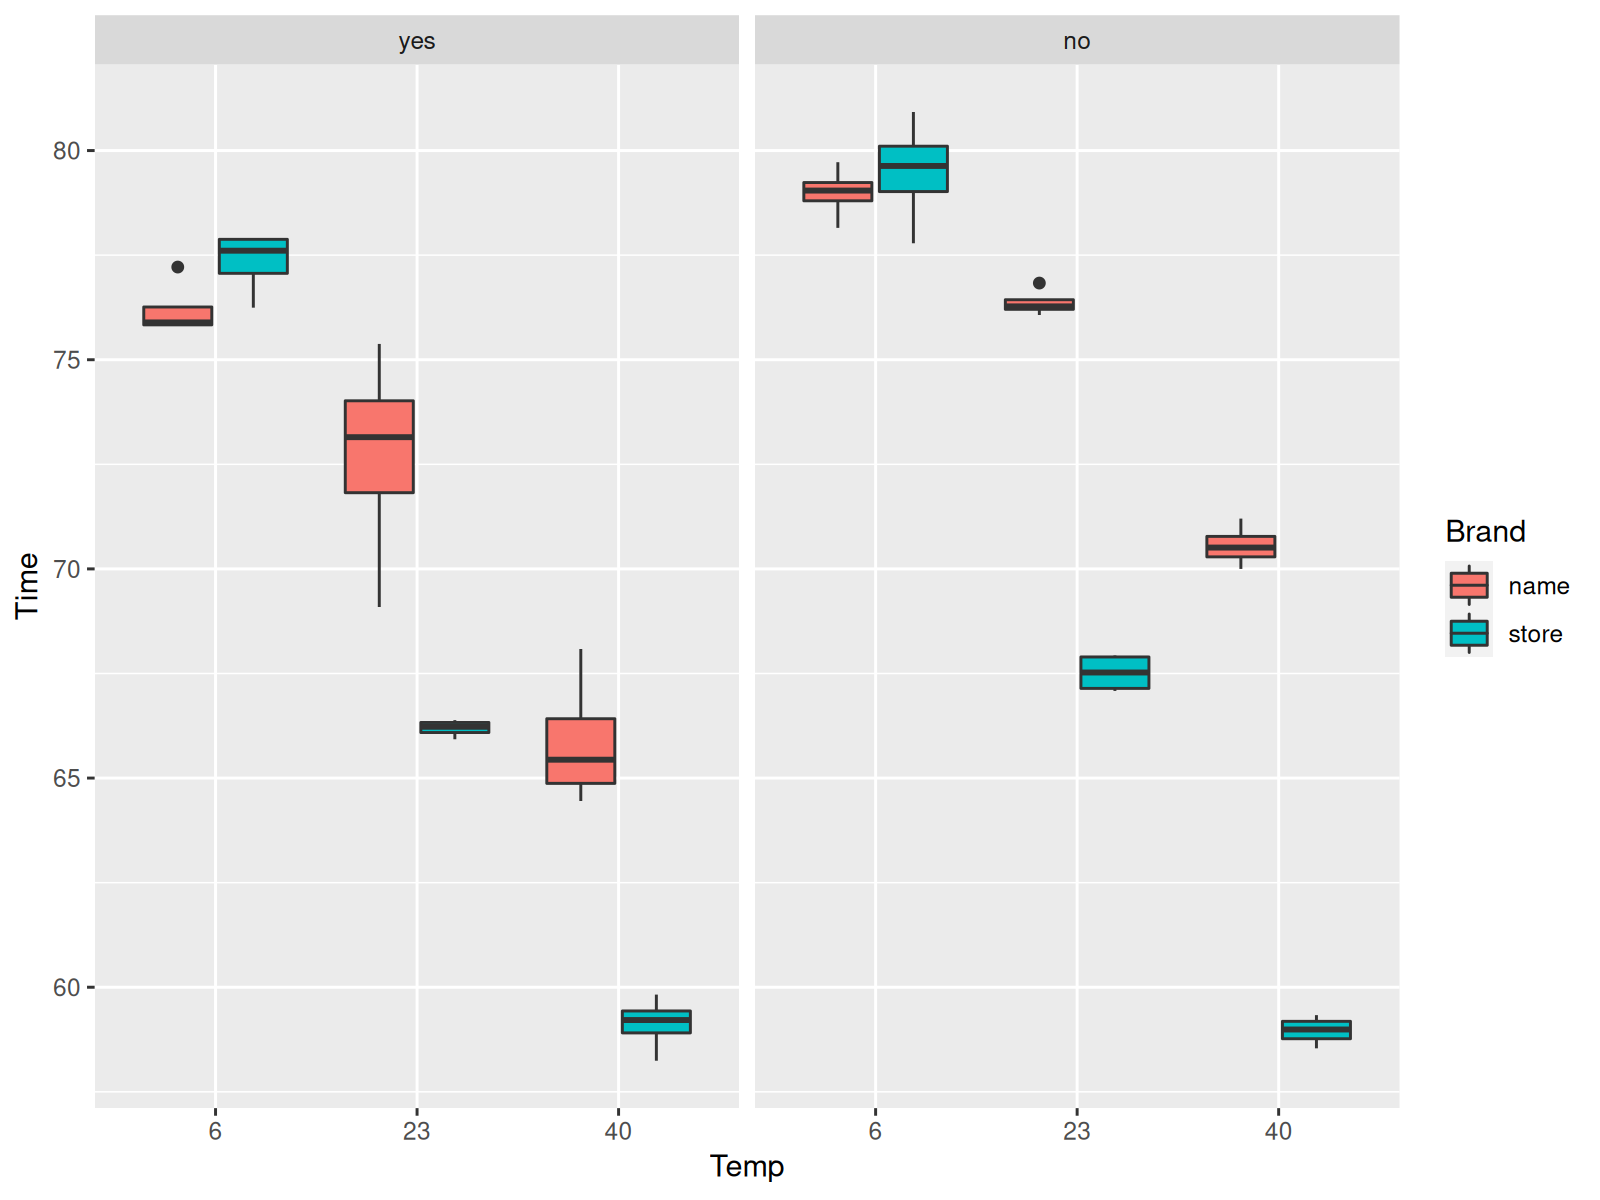

In [6]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 200)
df_eff %>% ggplot() + geom_boxplot(aes(fill = Brand, y = Time, x = Temp)) + facet_grid(cols = vars(Stirred))

Of the various boxplots that were produced, this one shows that temperature does have a significant effect on dissolve times for the tablets. Temperature affected both store and name brands in roughly similar fashions.

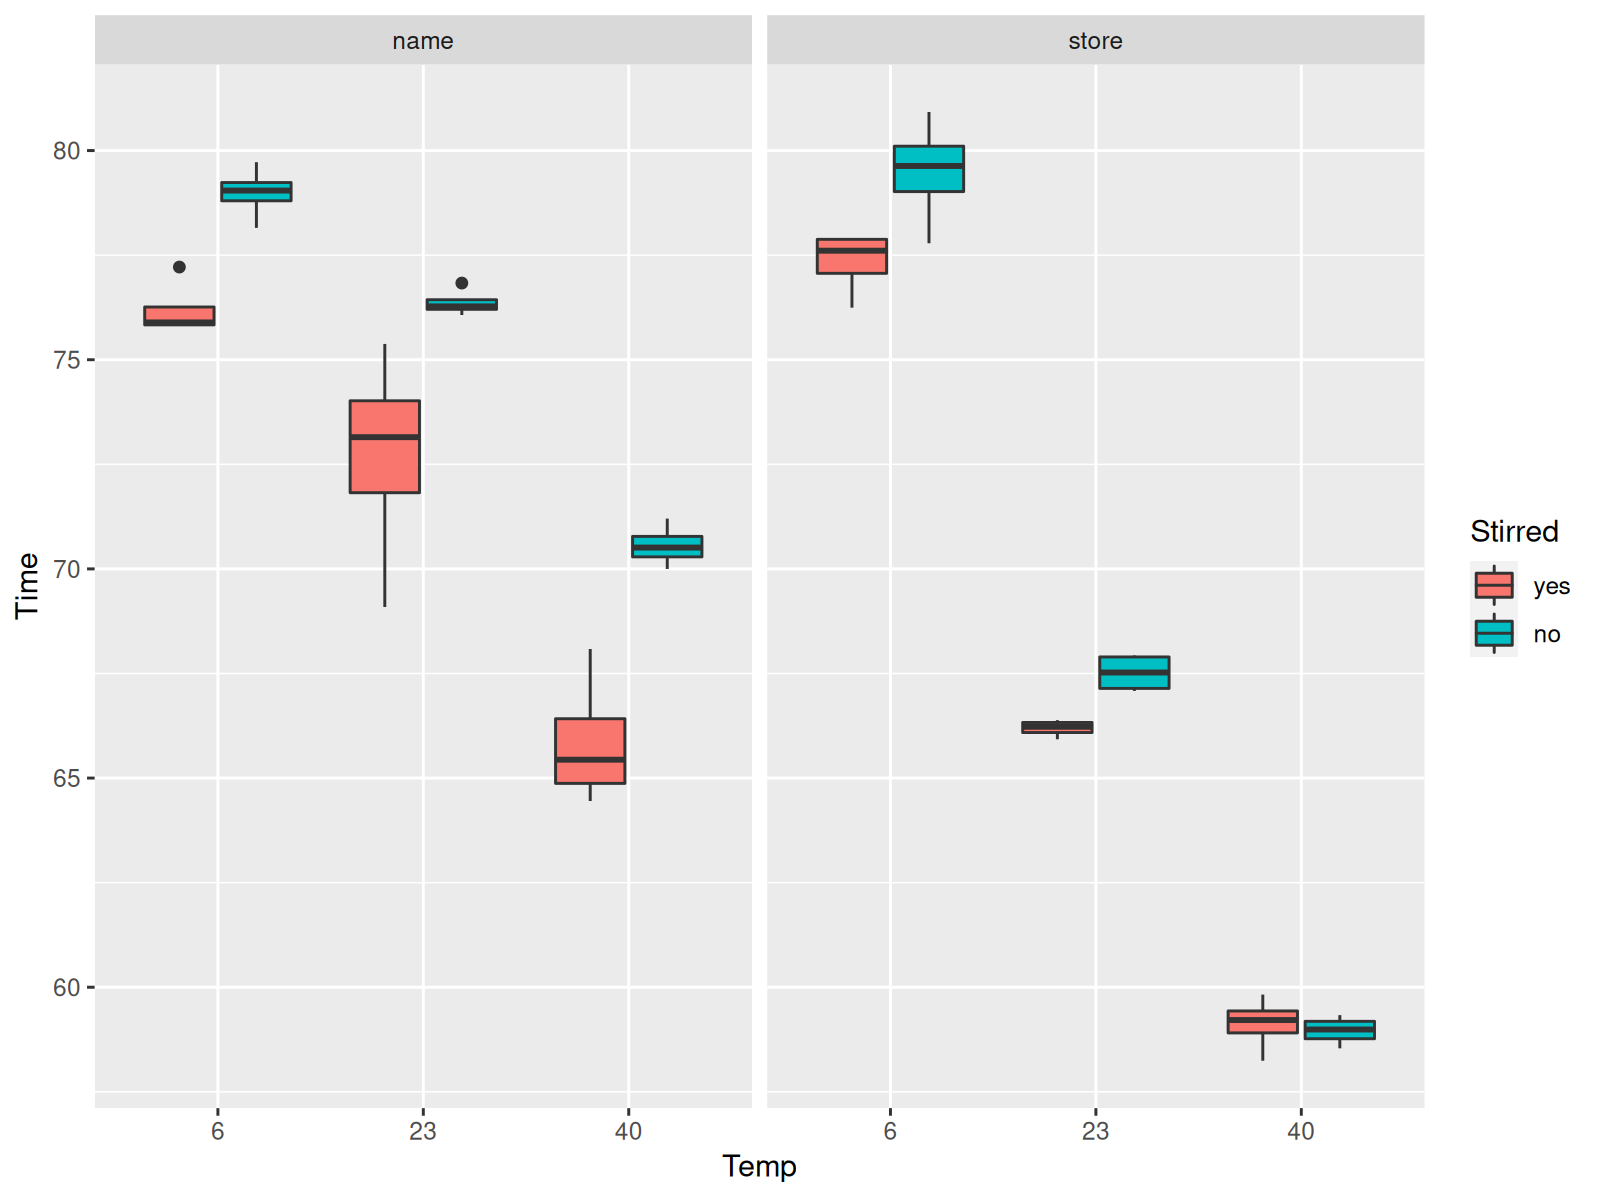

In [7]:
df_eff %>% ggplot() + geom_boxplot(aes(fill = Stirred, y = Time, x = Temp)) +  facet_grid(cols = vars(Brand))

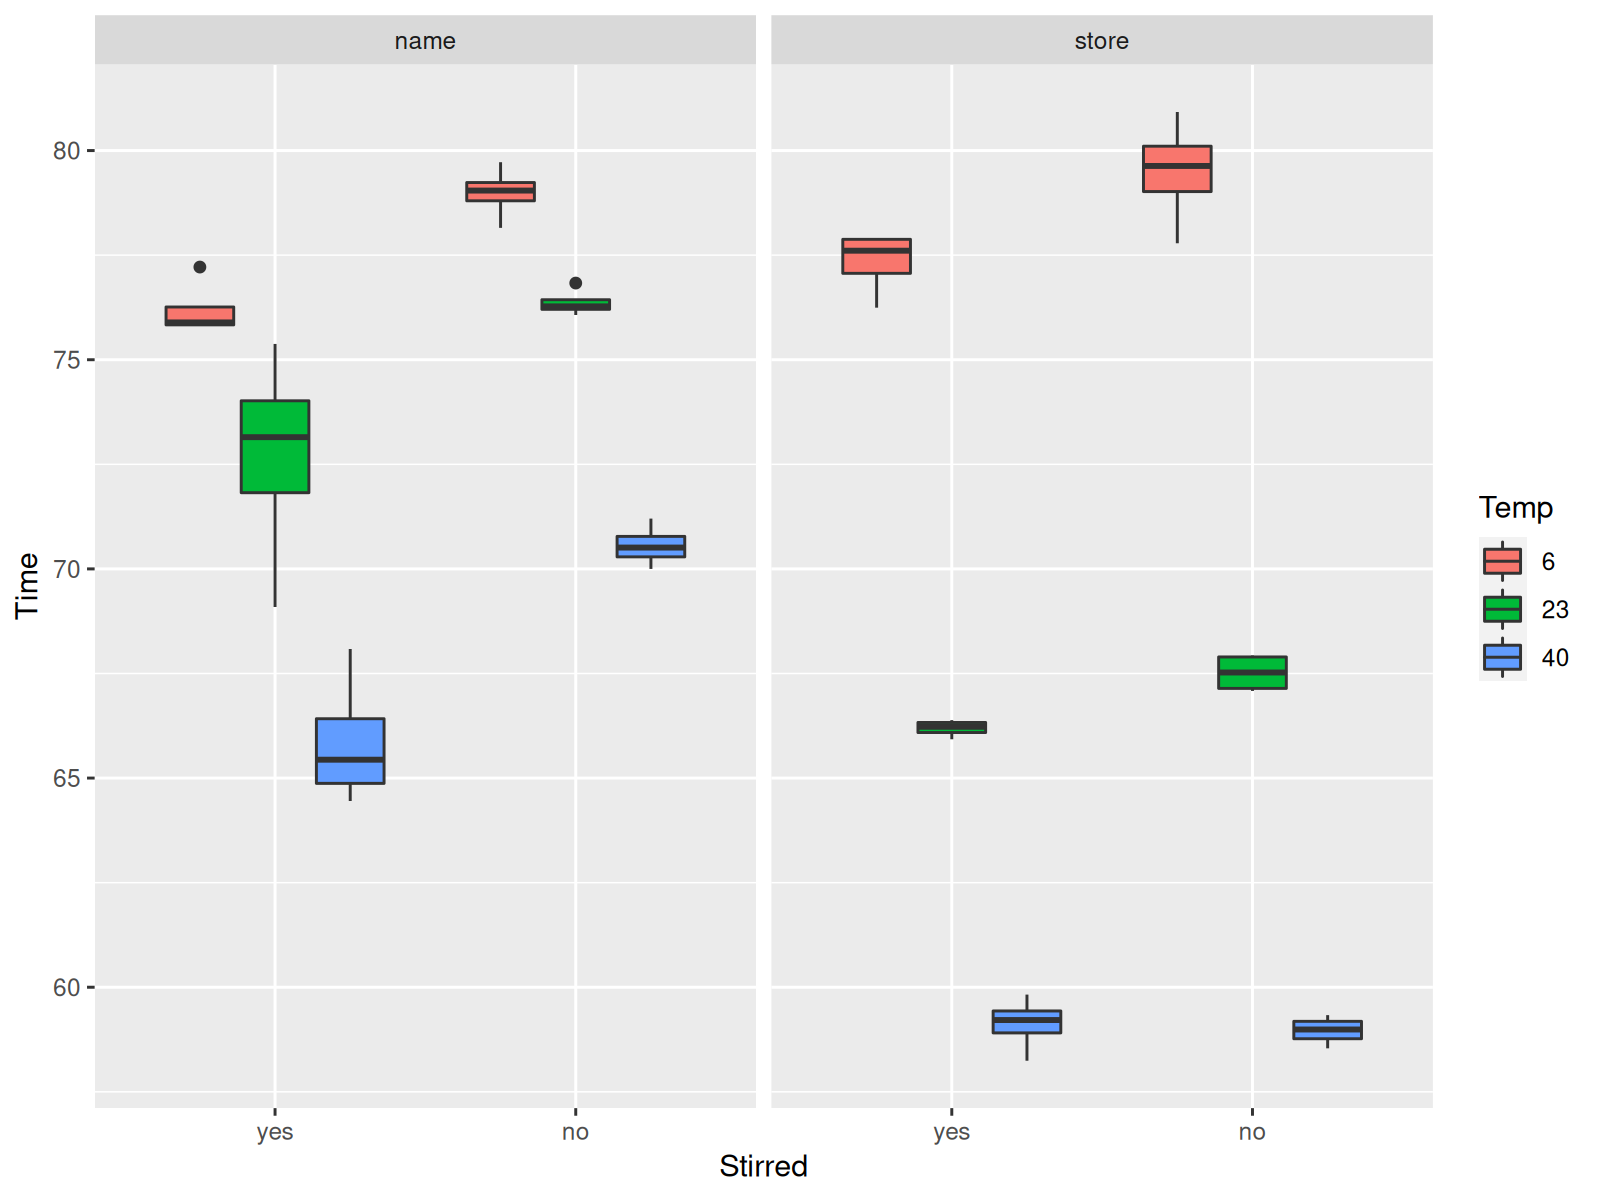

In [8]:
df_eff %>% ggplot() + geom_boxplot(aes(x = Stirred, y = Time, fill = Temp)) +  facet_grid(cols = vars(Brand))

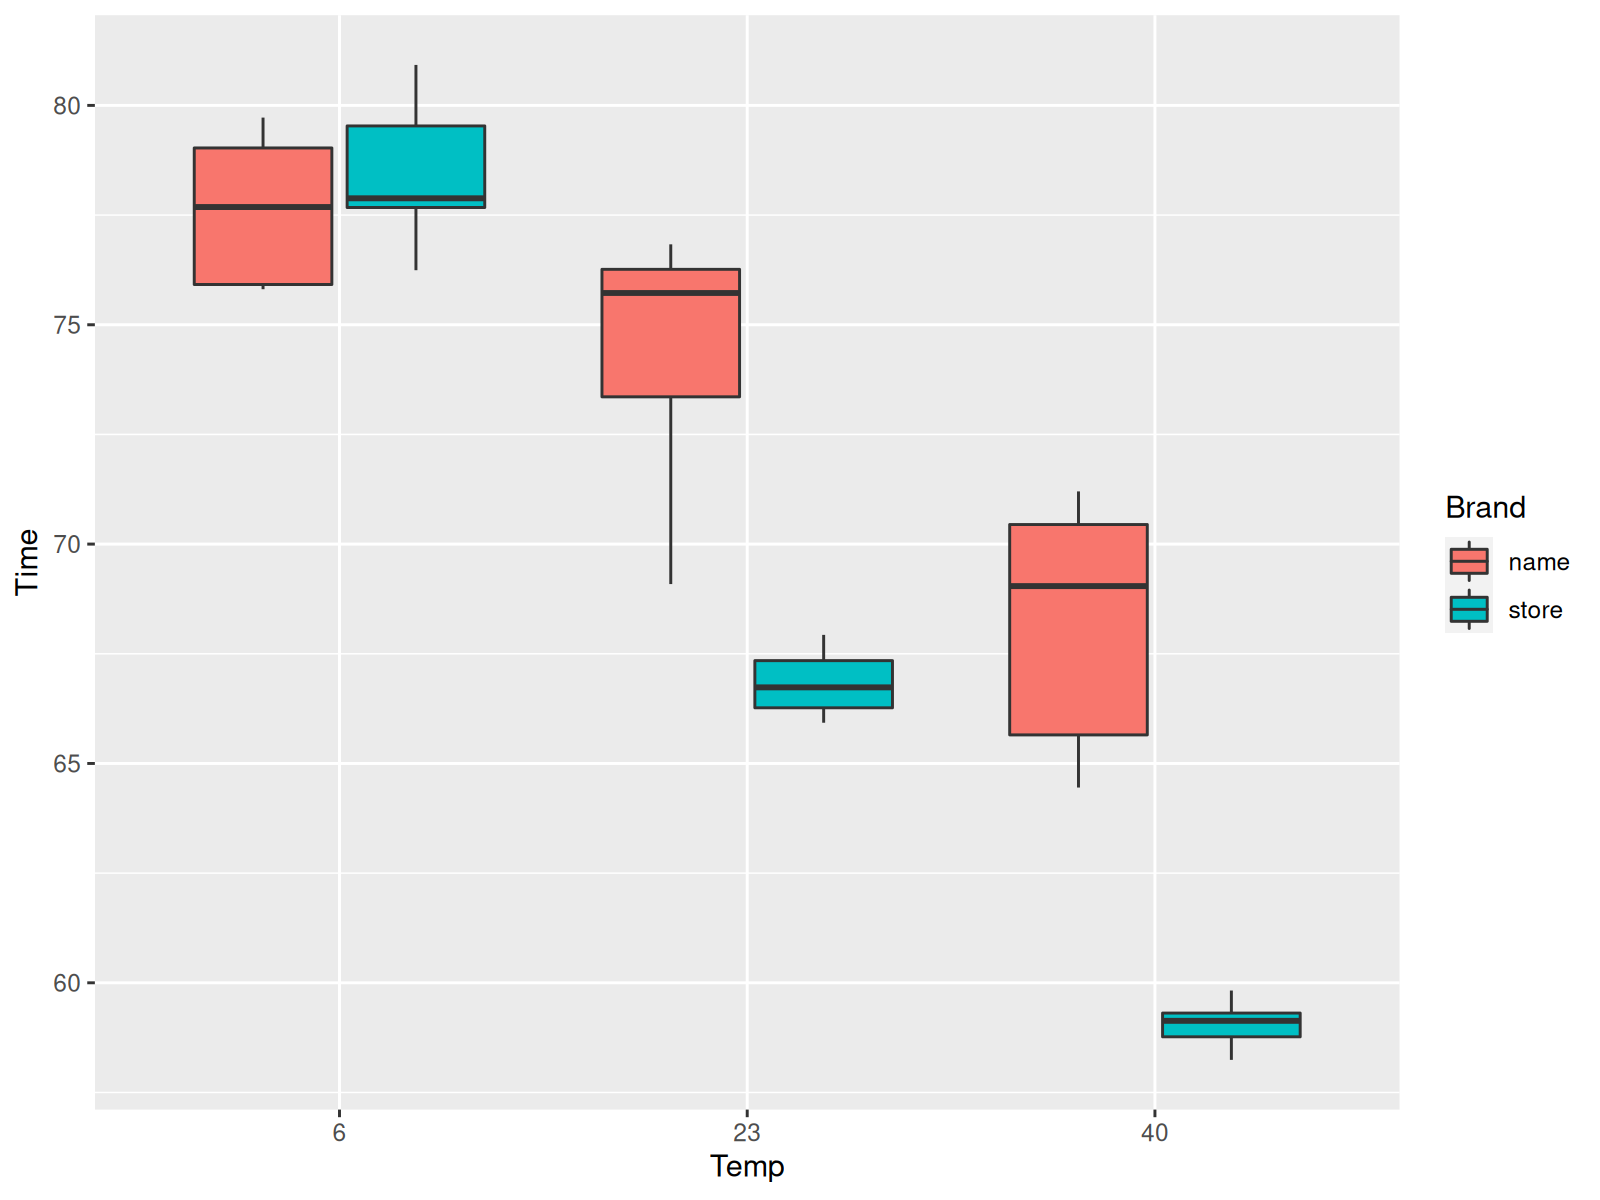

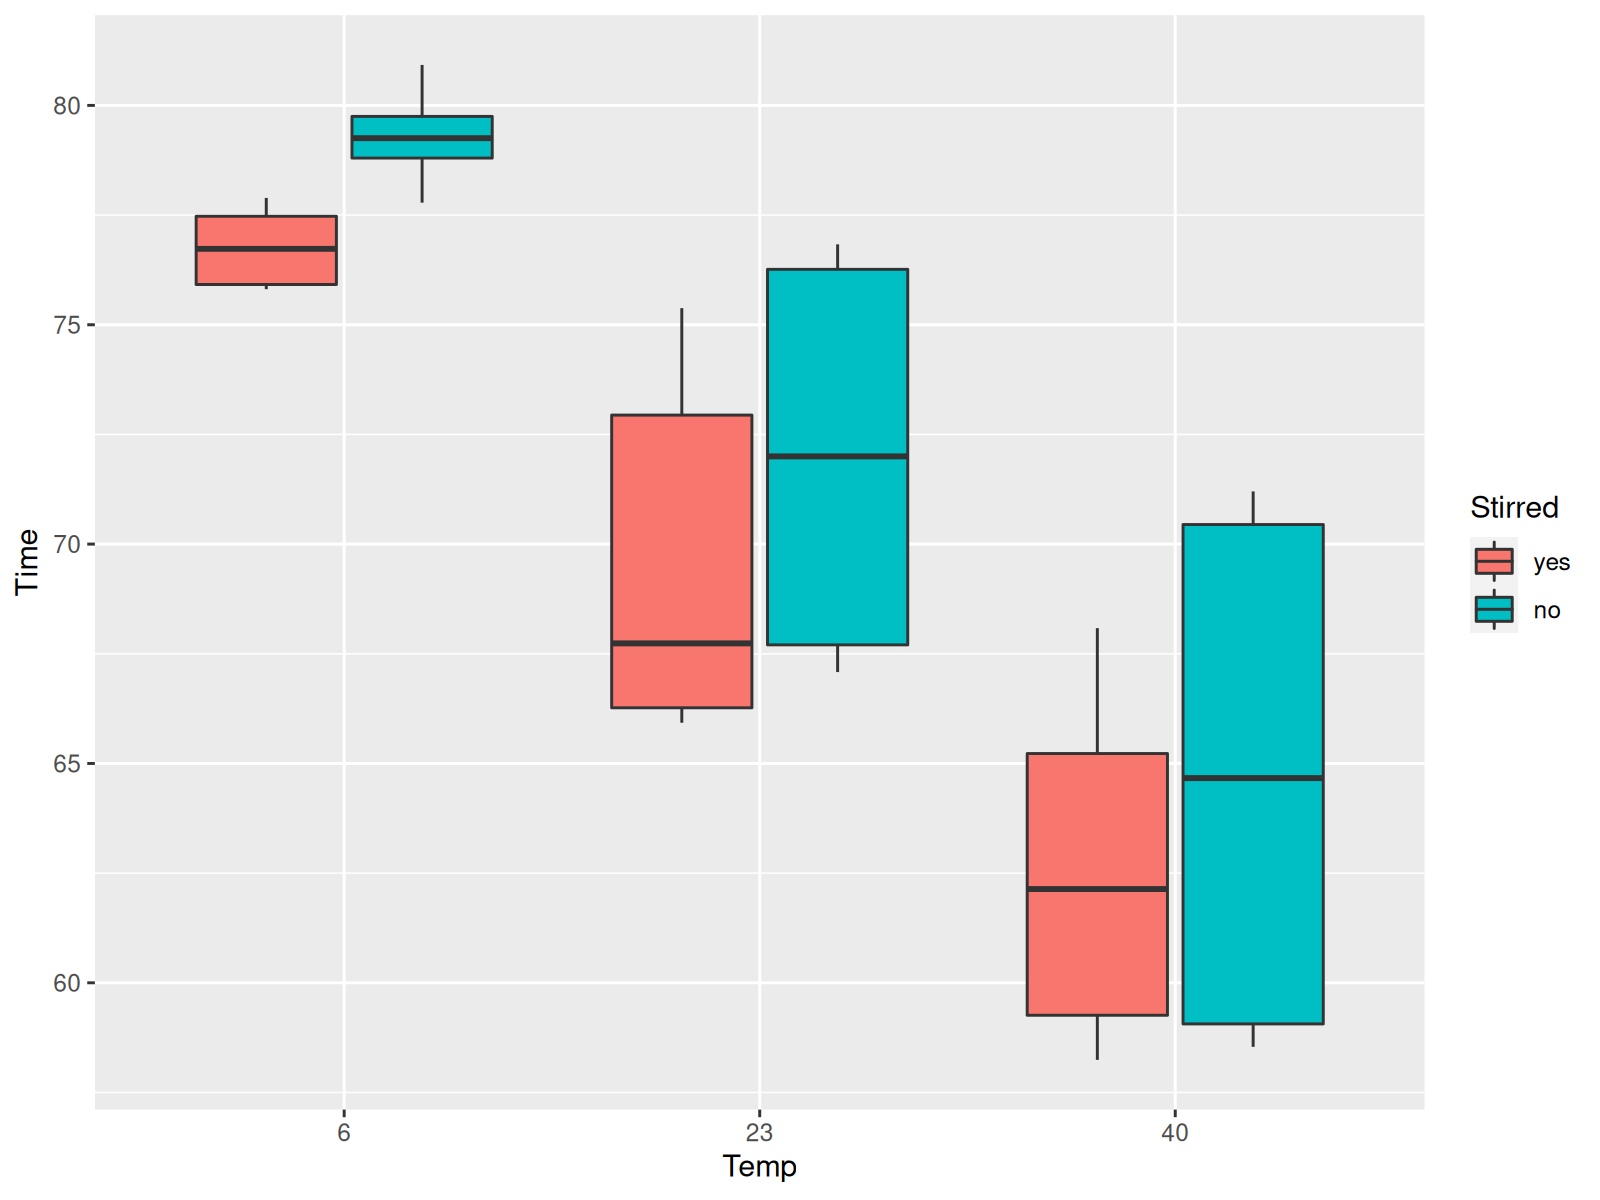

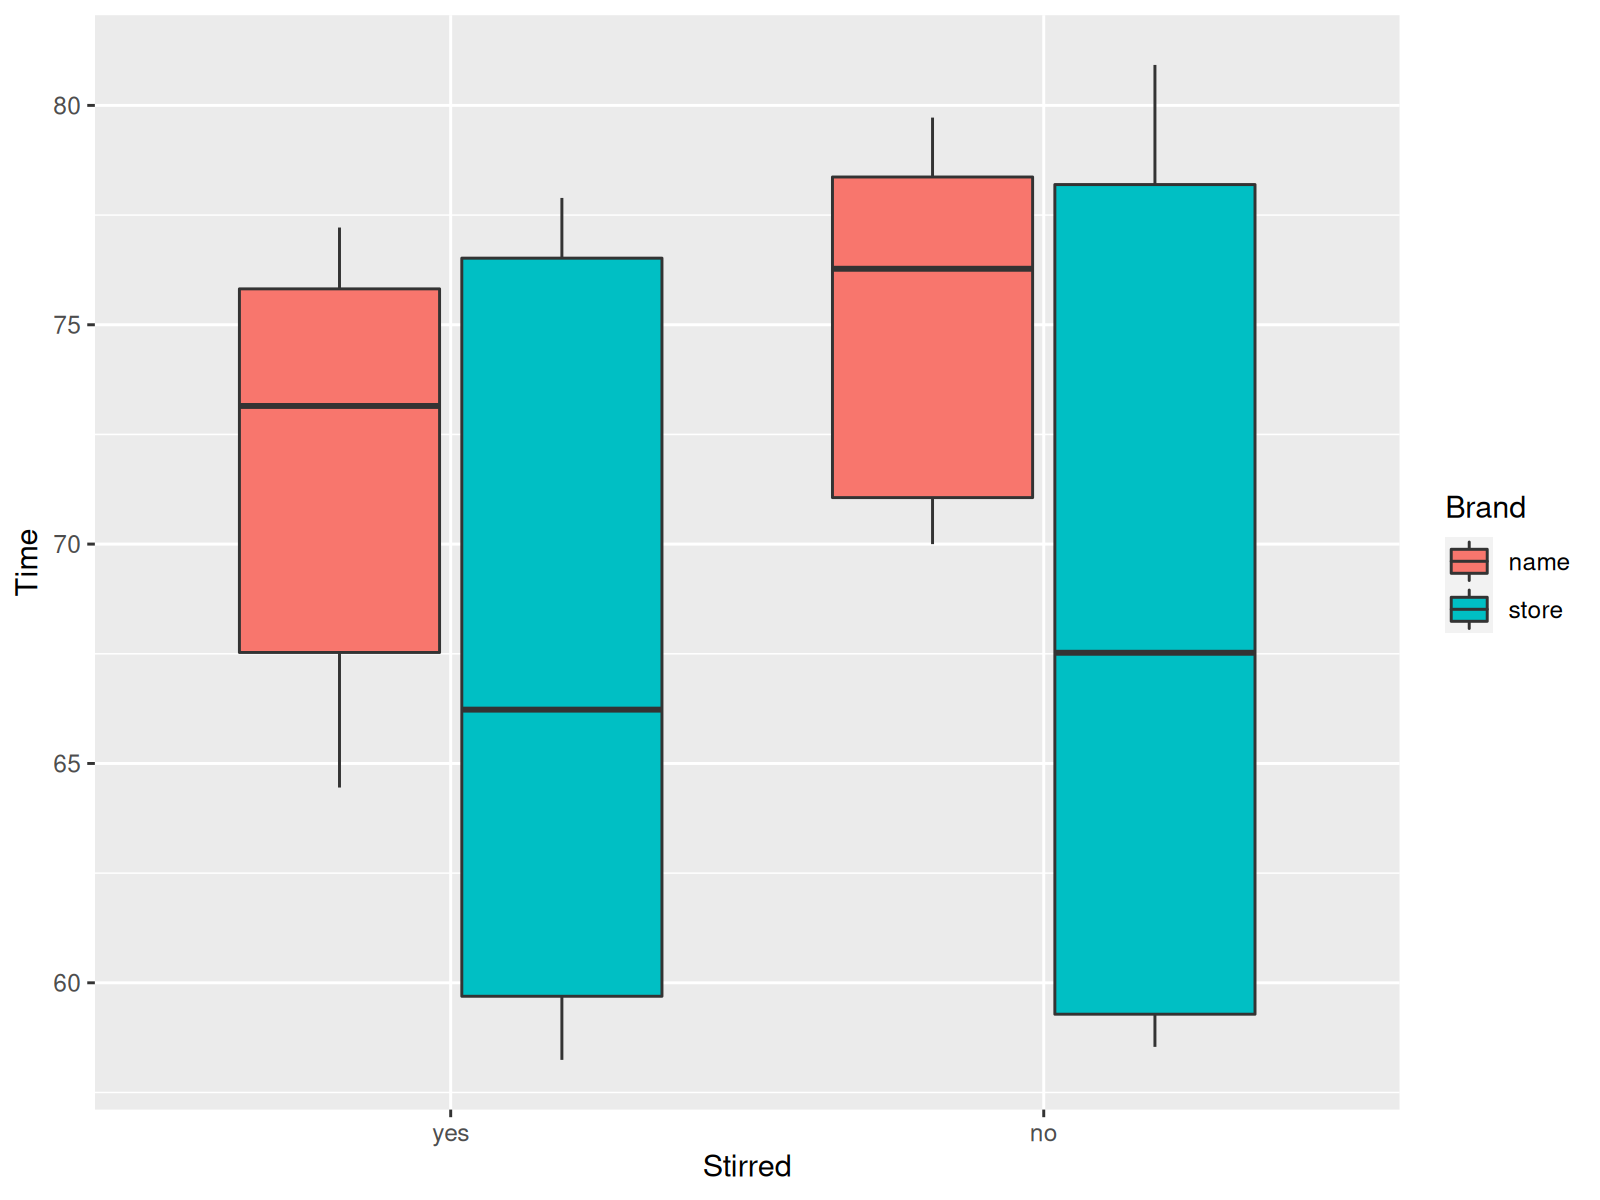

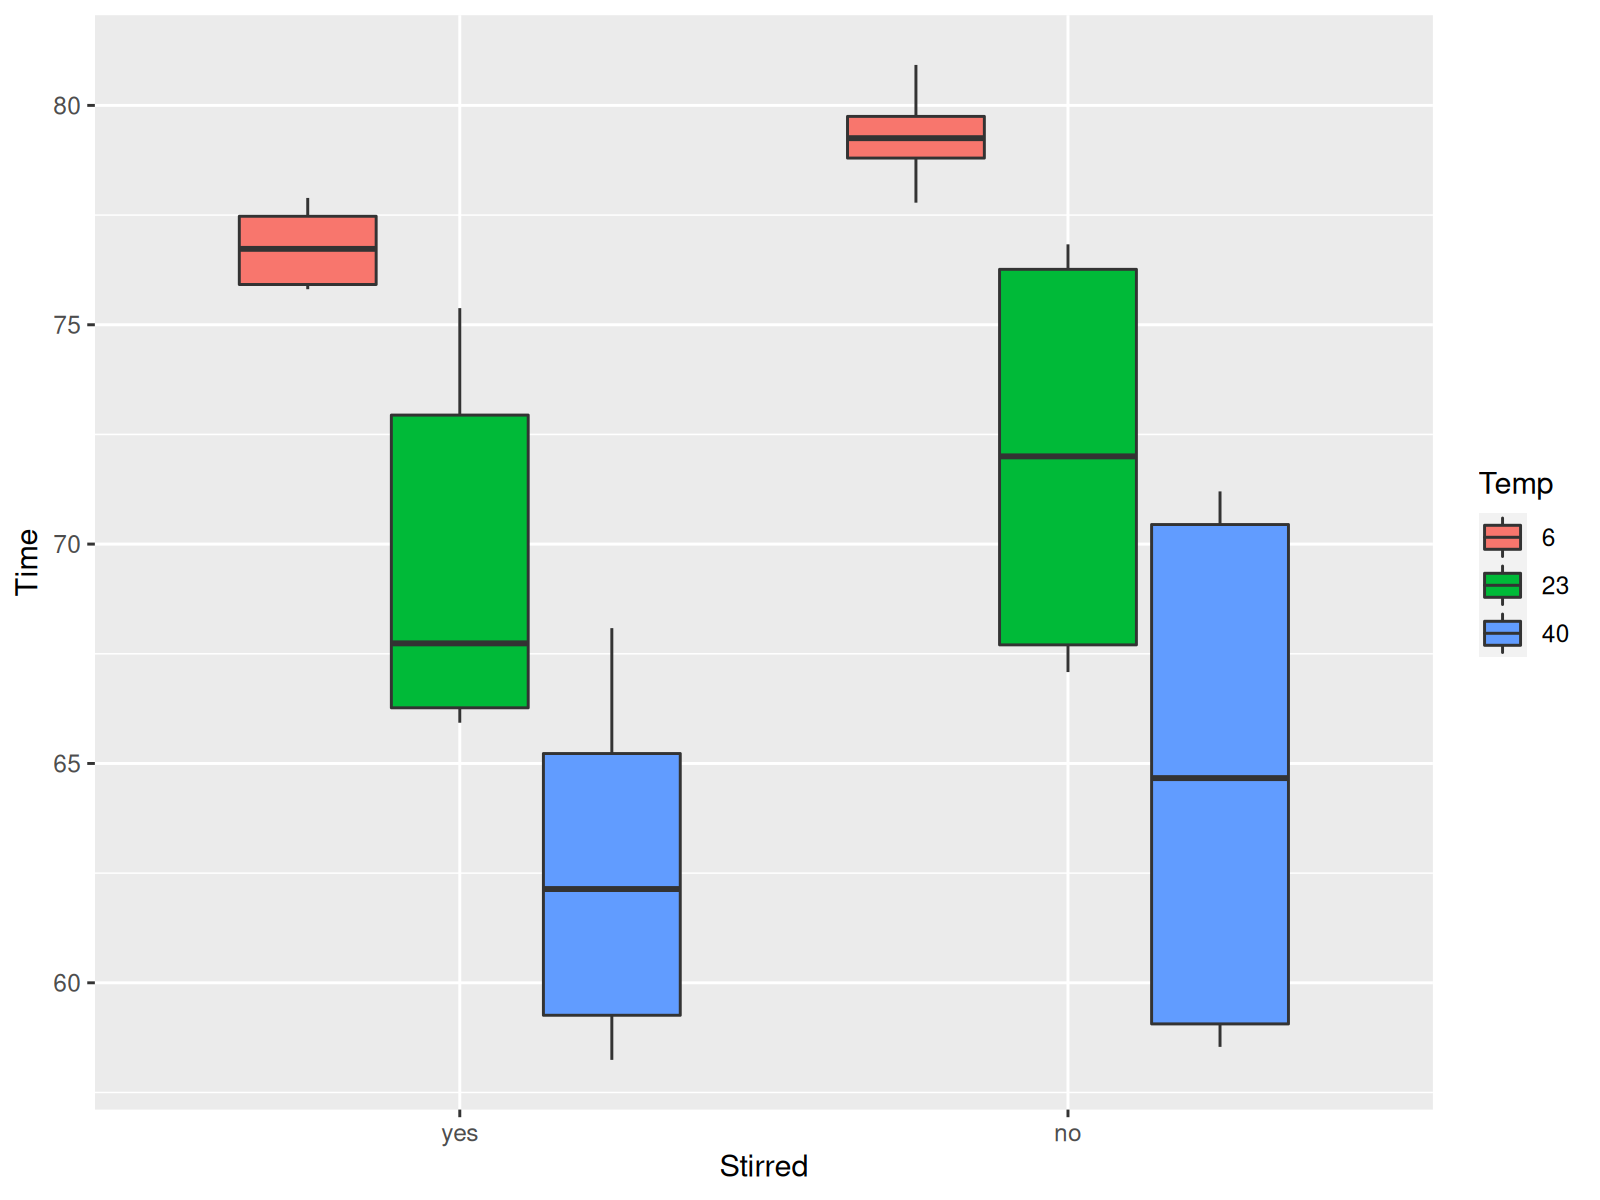

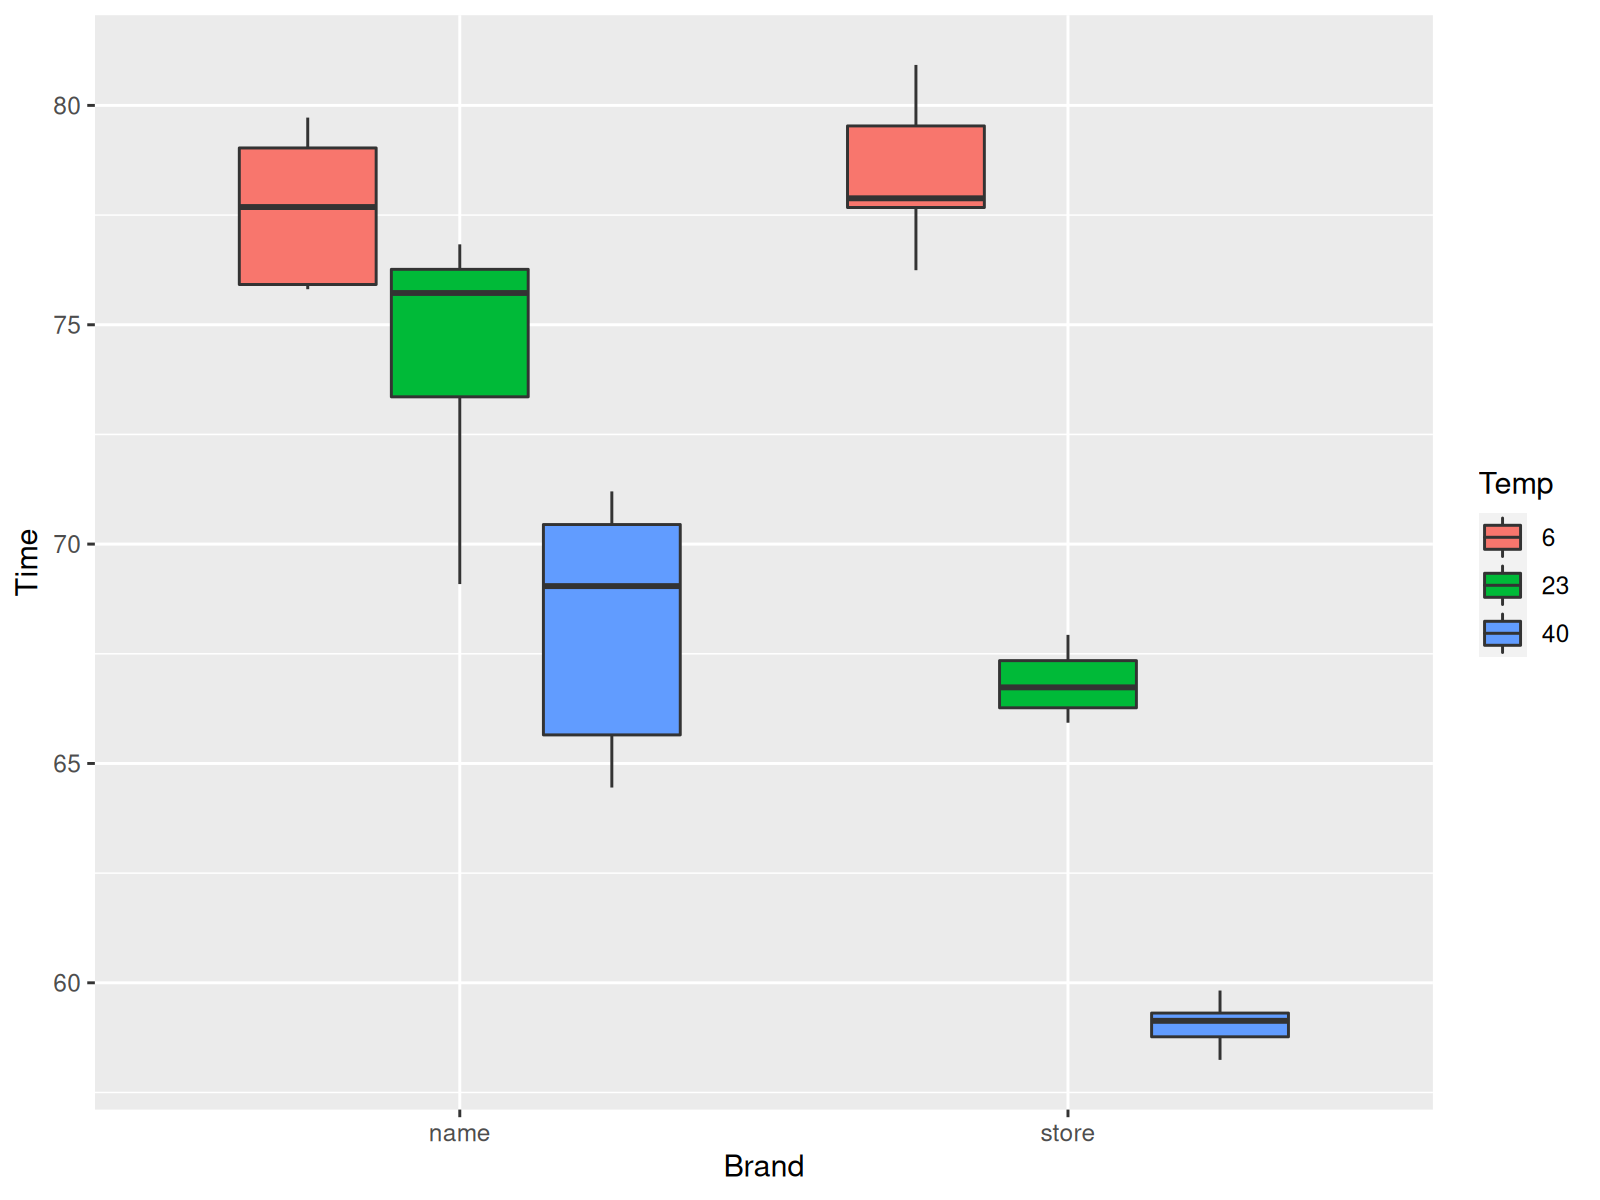

In [9]:
df_eff %>% ggplot() + geom_boxplot(aes(fill = Brand, y = Time, x = Temp))
df_eff %>% ggplot() + geom_boxplot(aes(fill = Stirred, y = Time, x = Temp))
df_eff %>% ggplot() + geom_boxplot(aes(fill = Brand, y = Time, x = Stirred))
df_eff %>% ggplot() + geom_boxplot(aes(fill = Temp, y = Time, x = Stirred))
df_eff %>% ggplot() + geom_boxplot(aes(fill = Temp, y = Time, x = Brand))

In [10]:
df_eff %>% group_by(Brand, Temp, Stirred) %>% summarise('Mean' = mean(Time), 'Var' = var(Time), 'n' = n())
df_eff %>% group_by(Brand) %>% summarise('Mean' = mean(Time), 'Var' = var(Time), 'n' = n())
df_eff %>% group_by(Temp) %>% summarise('Mean' = mean(Time), 'Var' = var(Time), 'n' = n())
df_eff %>% group_by(Stirred) %>% summarise('Mean' = mean(Time), 'Var' = var(Time), 'n' = n())

`summarise()` has grouped output by 'Brand', 'Temp'. You can override using the `.groups` argument.


Brand,Temp,Stirred,Mean,Var,n
<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>
name,6,yes,76.20241,0.45934925,4
name,6,no,78.99061,0.41464405,4
name,23,yes,72.69145,6.98690870,4
name,23,no,76.36351,0.10781342,4
name,40,yes,65.85343,2.54997510,4
name,40,no,70.55511,0.25440333,4
store,6,yes,77.33703,0.59648839,4
store,6,no,79.49240,1.69425169,4
store,23,yes,66.19126,0.04110242,4


Brand,Mean,Var,n
<fct>,<dbl>,<dbl>,<int>
name,73.44276,21.13144,24
store,68.10416,67.03190,24


Temp,Mean,Var,n
<fct>,<dbl>,<dbl>,<int>
6,78.00561,2.467426,16
23,70.69044,19.204515,16
40,63.62433,25.996561,16


Stirred,Mean,Var,n
<fct>,<dbl>,<dbl>,<int>
yes,69.56681,44.63986,24
no,71.98011,55.35476,24


`summarise()` has grouped output by 'Brand'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Temp'. You can override using the `.groups` argument.


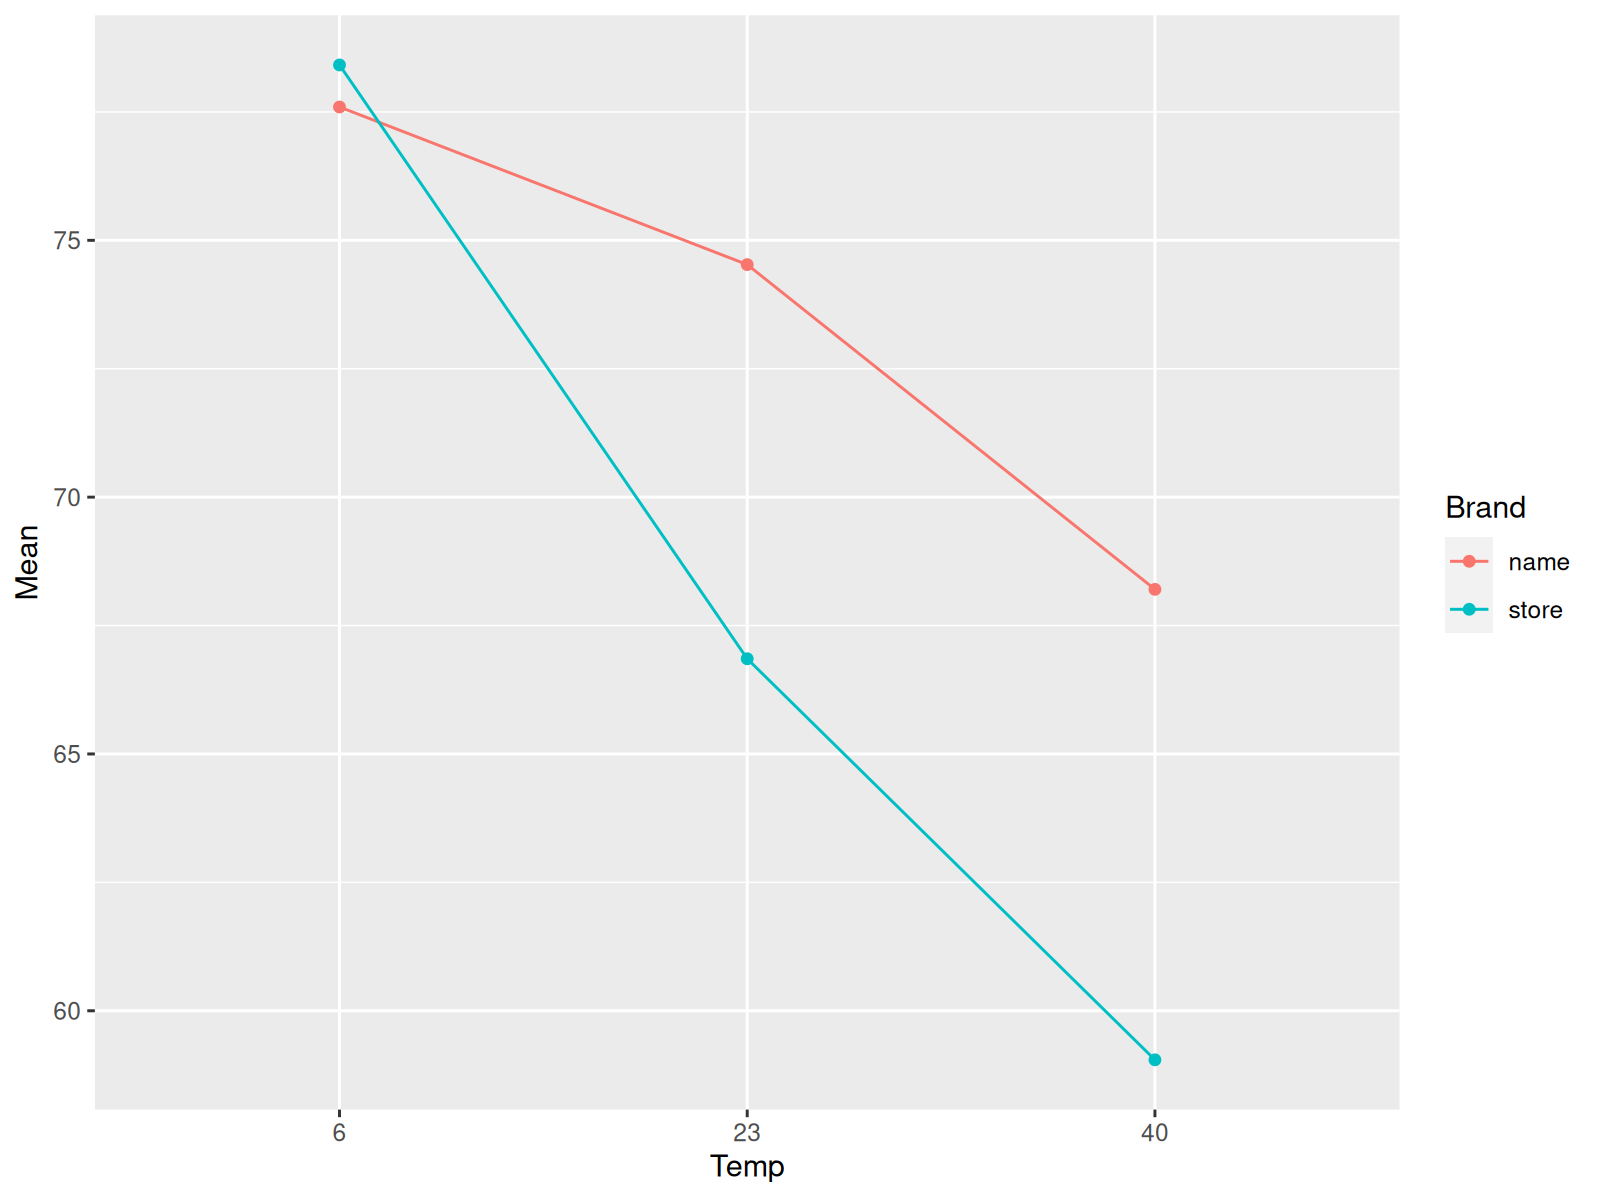

`summarise()` has grouped output by 'Stirred'. You can override using the `.groups` argument.


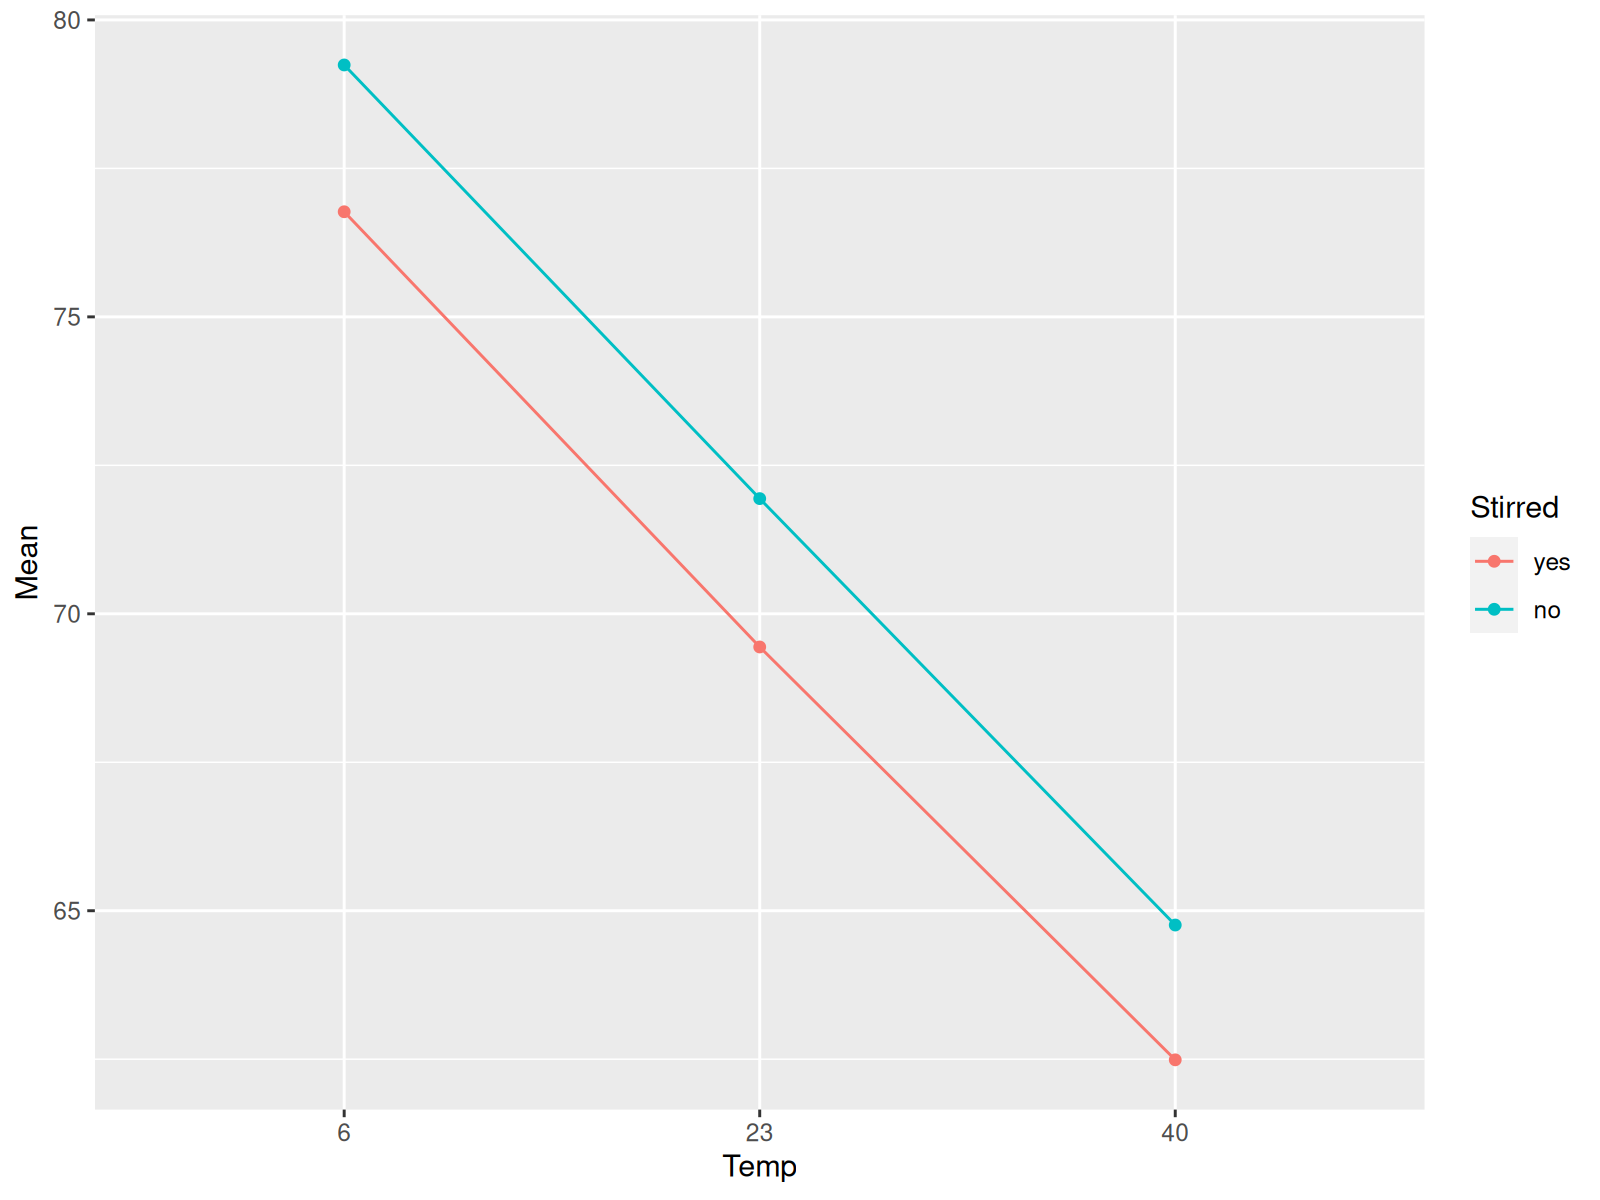

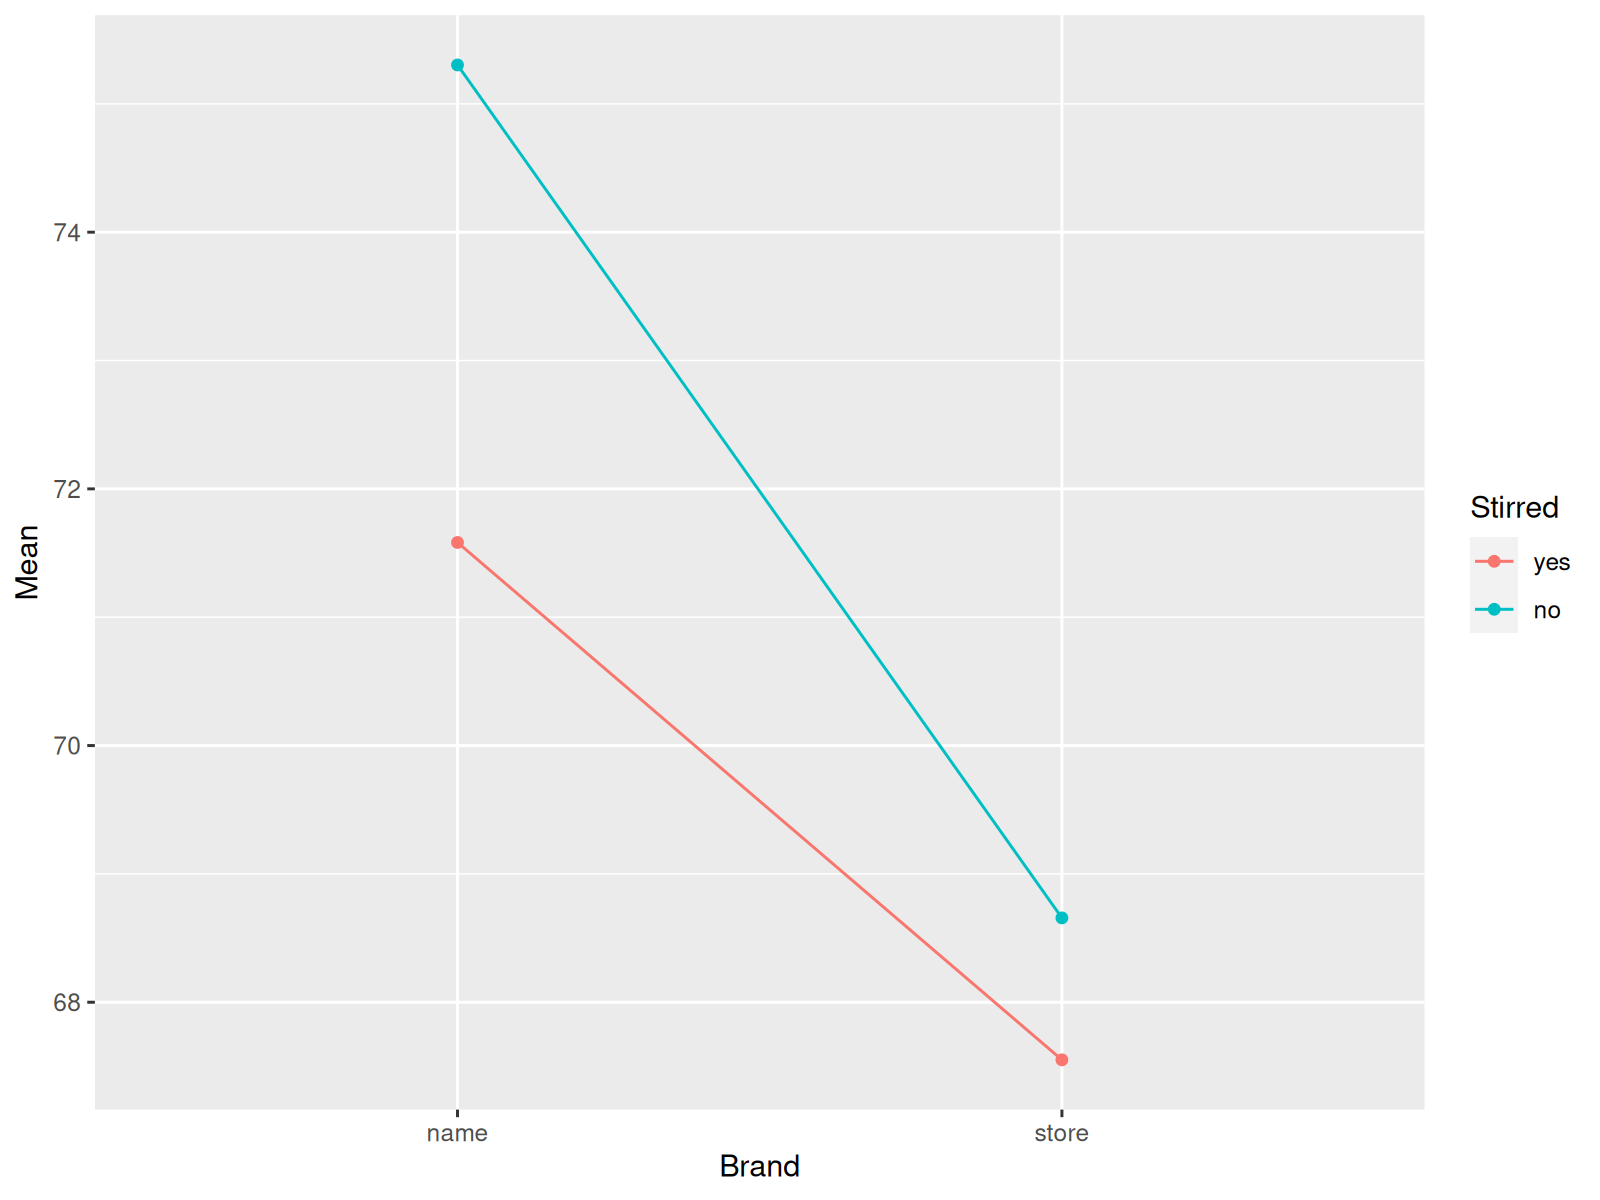

In [11]:
df_eff %>% group_by(Brand, Temp) %>% summarise('Mean' = mean(Time), 'Var' = var(Time), 'n' = n()) %>% 
    ggplot(aes(y = Mean, group = Brand, x = Temp, col = Brand)) + geom_line() + geom_point()
df_eff %>% group_by(Temp, Stirred) %>% summarise('Mean' = mean(Time), 'Var' = var(Time), 'n' = n()) %>% 
    ggplot(aes(y = Mean, group = Stirred, x = Temp, col = Stirred)) + geom_line() + geom_point()
df_eff %>% group_by(Stirred, Brand) %>% summarise('Mean' = mean(Time), 'Var' = var(Time), 'n' = n()) %>% 
    ggplot(aes(y = Mean, group = Stirred, x = Brand, col = Stirred)) + geom_line() + geom_point()

In [12]:
aov_eff <- aov(lm_eff <- lm(Time ~ Brand * Temp * Stirred, data = df_eff))
summary(lm_eff)
summary(aov_eff)
print(Anova(lm(Time ~ Brand * Temp * Stirred, data = df_eff), type = 3))


Call:
lm(formula = Time ~ Brand * Temp * Stirred, data = df_eff)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6021 -0.3538  0.0077  0.3816  2.6871 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  76.2024     0.5374 141.794  < 2e-16 ***
Brandstore                    1.1346     0.7600   1.493 0.144185    
Temp23                       -3.5110     0.7600  -4.620 4.78e-05 ***
Temp40                      -10.3490     0.7600 -13.617 9.05e-16 ***
Stirredno                     2.7882     0.7600   3.669 0.000783 ***
Brandstore:Temp23            -7.6348     1.0748  -7.103 2.40e-08 ***
Brandstore:Temp40            -7.8628     1.0748  -7.315 1.27e-08 ***
Brandstore:Stirredno         -0.6328     1.0748  -0.589 0.559694    
Temp23:Stirredno              0.8839     1.0748   0.822 0.416308    
Temp40:Stirredno              1.9135     1.0748   1.780 0.083476 .  
Brandstore:Temp23:Stirredno  -1.7150     1.5200  -1.128 0.266685  

                   Df Sum Sq Mean Sq F value   Pr(>F)    
Brand               1  342.0   342.0 296.041  < 2e-16 ***
Temp                2 1654.7   827.4 716.169  < 2e-16 ***
Stirred             1   69.9    69.9  60.495 3.22e-09 ***
Brand:Temp          2  231.9   115.9 100.345 1.90e-15 ***
Brand:Stirred       1   20.5    20.5  17.753 0.000161 ***
Temp:Stirred        2    0.1     0.1   0.054 0.947535    
Brand:Temp:Stirred  2    9.1     4.5   3.919 0.028838 *  
Residuals          36   41.6     1.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova Table (Type III tests)

Response: Time
                    Sum Sq Df    F value    Pr(>F)    
(Intercept)        23227.2  1 20105.4508 < 2.2e-16 ***
Brand                  2.6  1     2.2287 0.1441852    
Temp                 221.6  2    95.9006 3.780e-15 ***
Stirred               15.5  1    13.4584 0.0007832 ***
Brand:Temp            80.1  2    34.6716 4.041e-09 ***
Brand:Stirred          0.4  1     0.3466 0.5596939    
Temp:Stirred           3.7  2     1.5877 0.2183718    
Brand:Temp:Stirred     9.1  2     3.9195 0.0288376 *  
Residuals             41.6 36                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


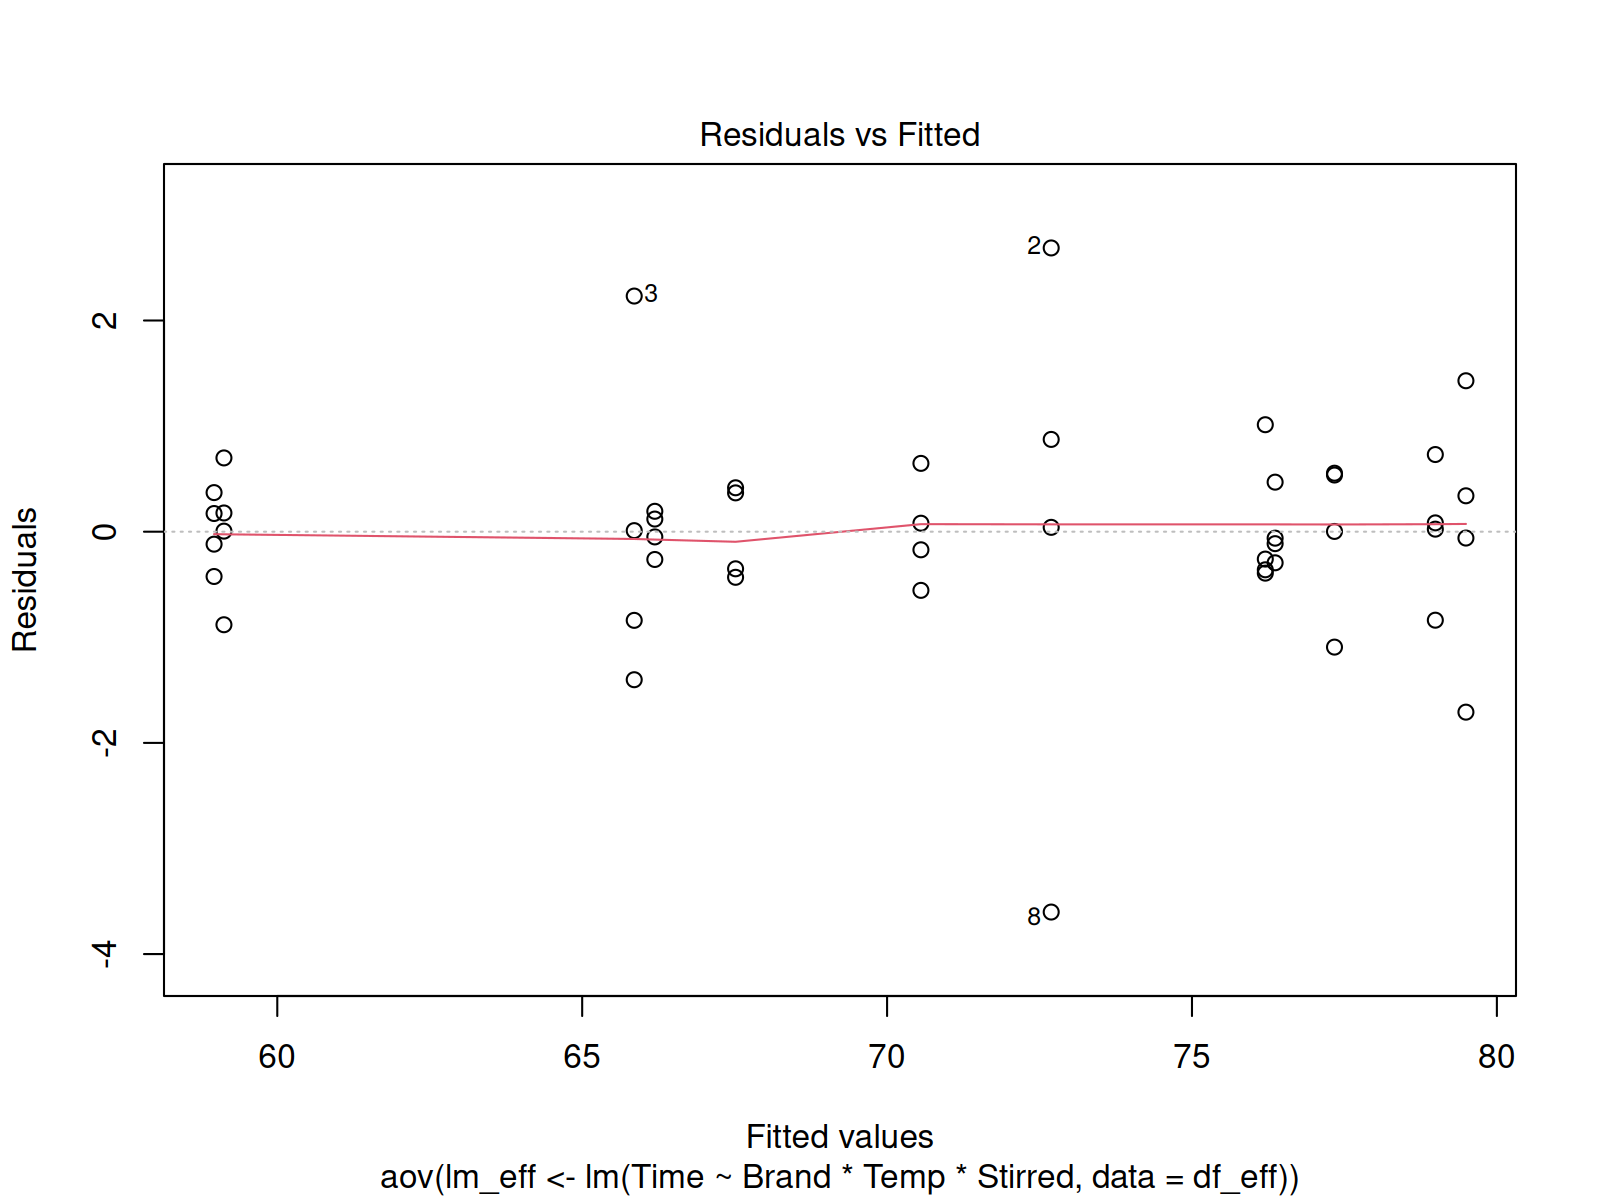

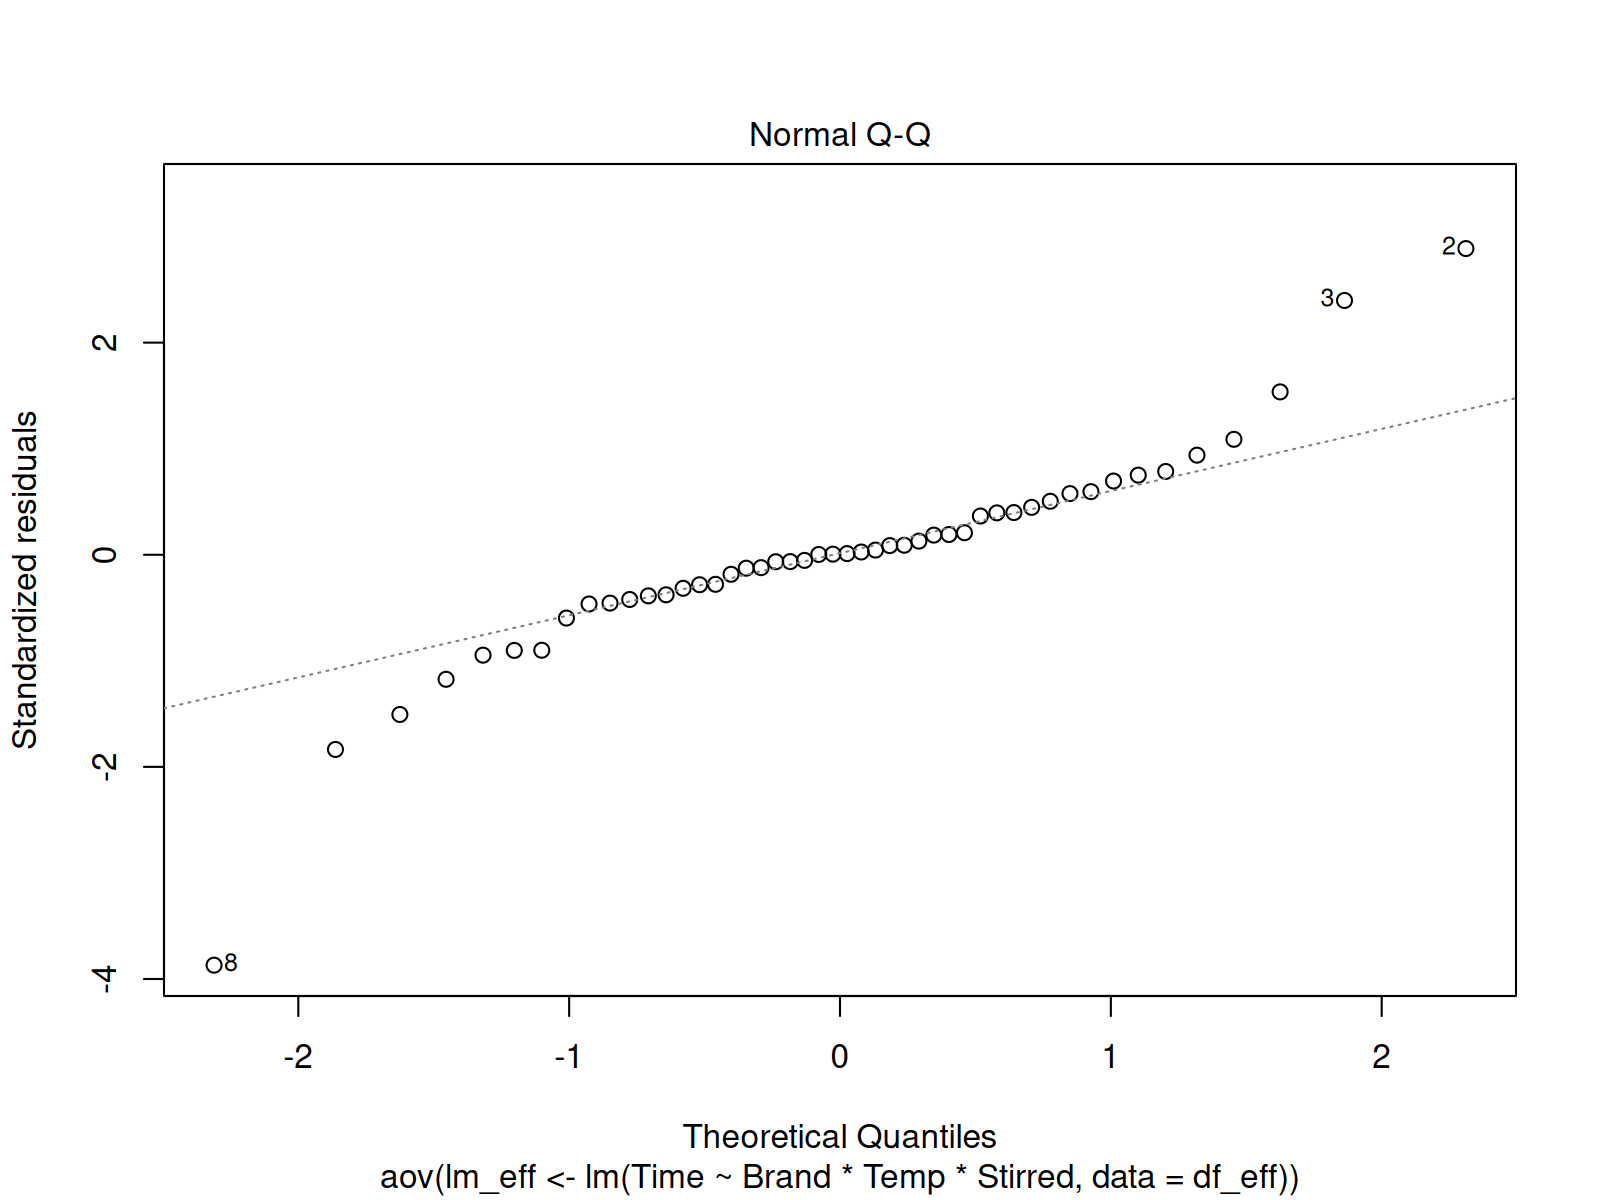

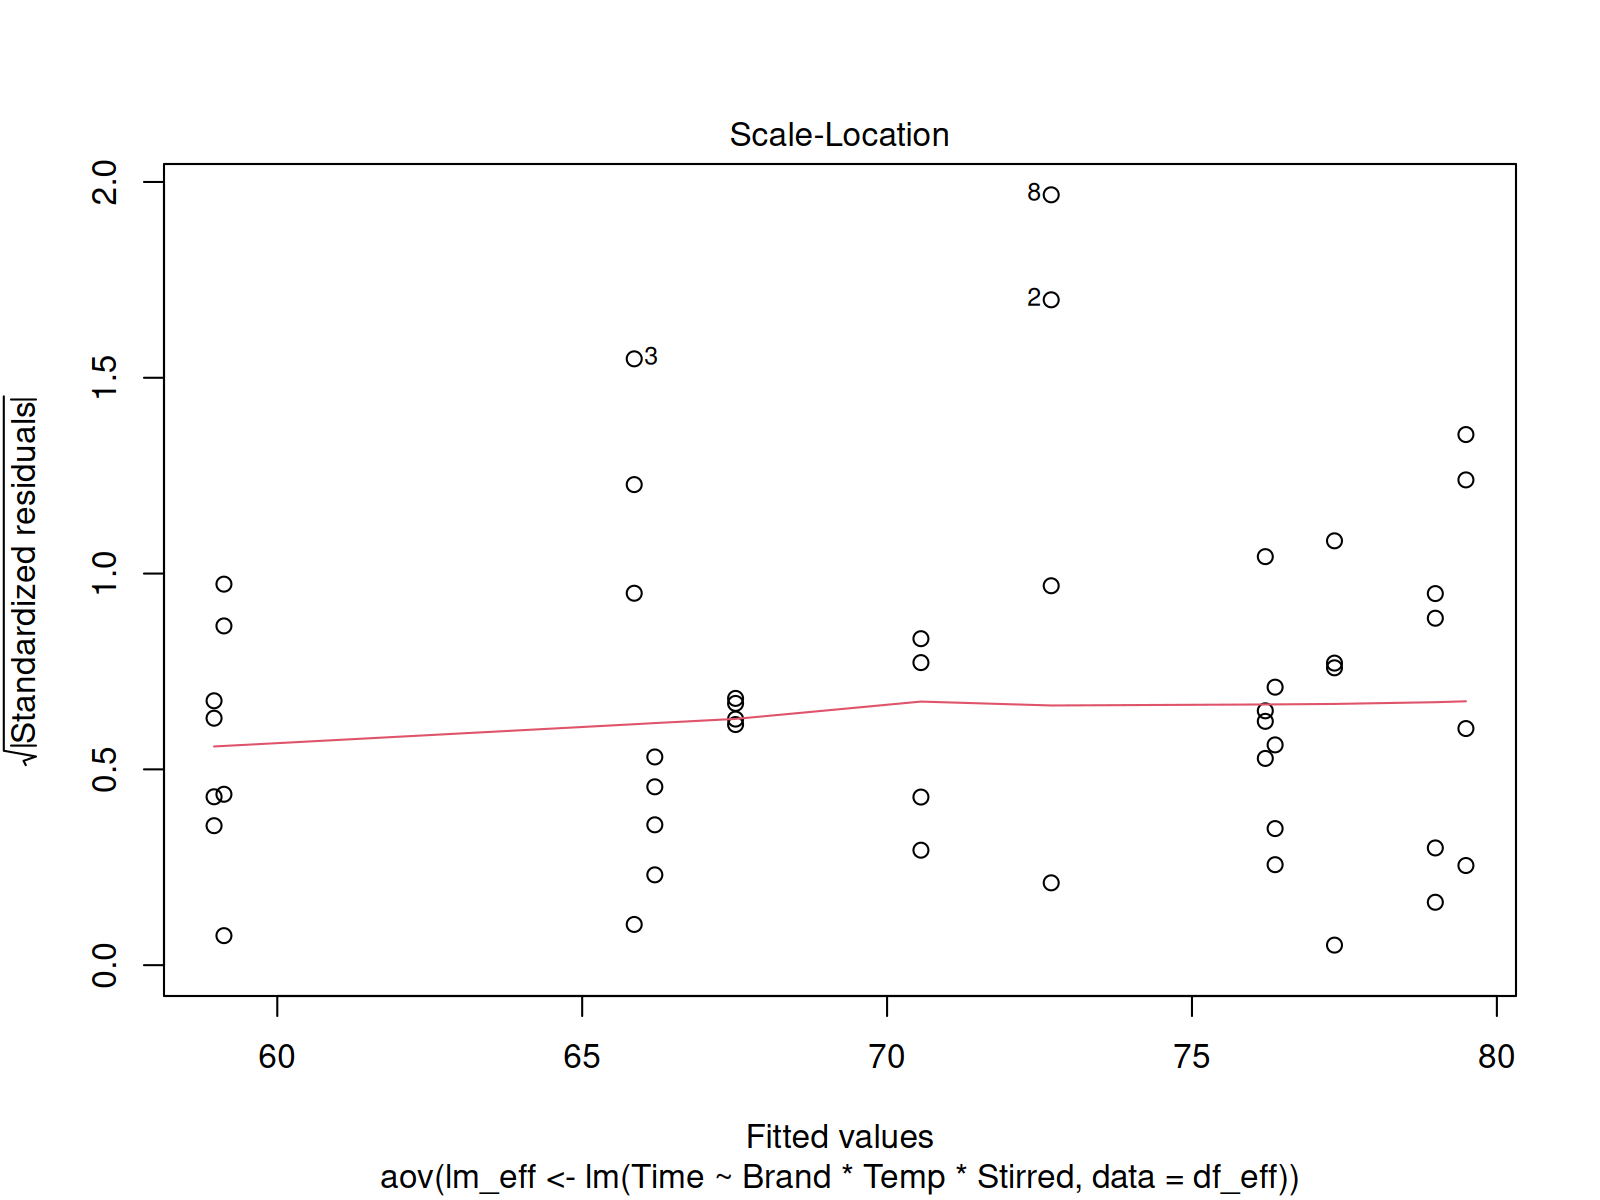

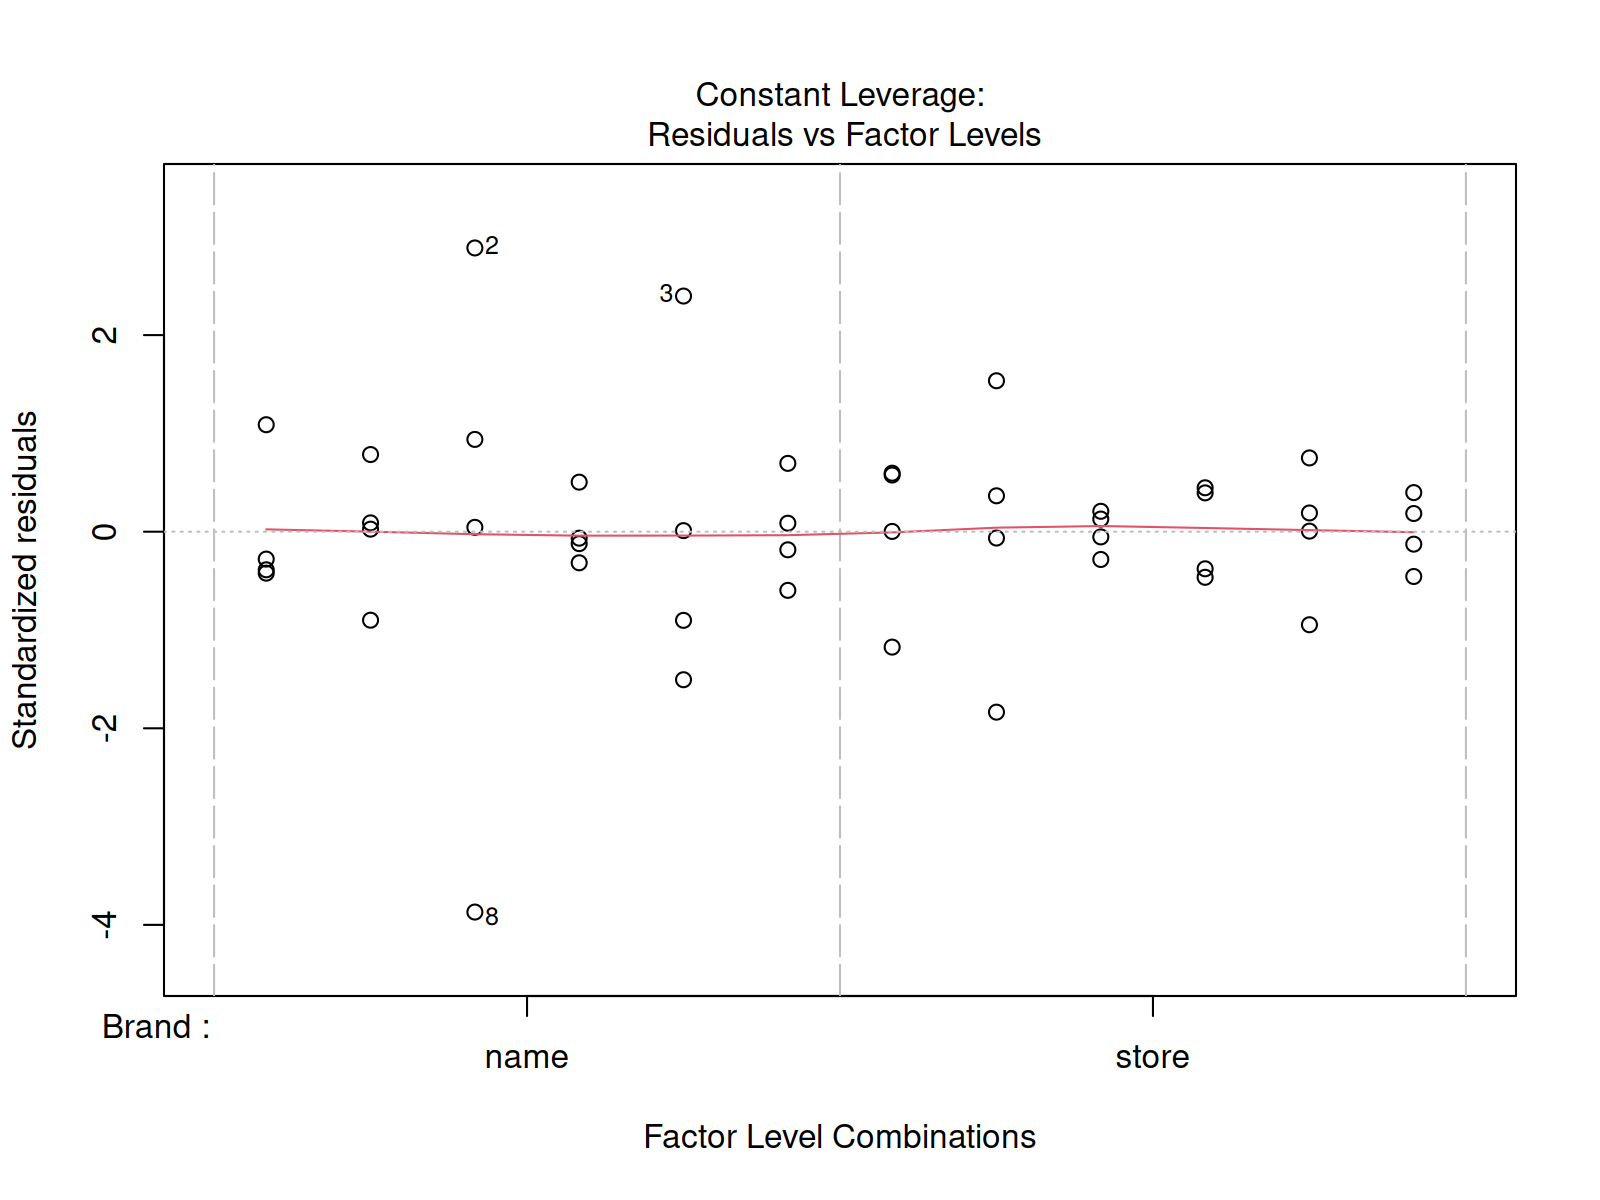

In [13]:
plot(aov_eff)

In [14]:
means_eff <- emmeans(aov_eff, specs = c('Brand', 'Temp', 'Stirred'))
summary(means_eff)

,Brand,Temp,Stirred,emmean,SE,df,lower.CL,upper.CL
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,name,6,yes,76.20241,0.5374175,36,75.11248,77.29235
2,store,6,yes,77.33703,0.5374175,36,76.24709,78.42696
3,name,23,yes,72.69145,0.5374175,36,71.60152,73.78138
4,store,23,yes,66.19126,0.5374175,36,65.10132,67.28119
5,name,40,yes,65.85343,0.5374175,36,64.76350,66.94337
6,store,40,yes,59.12529,0.5374175,36,58.03535,60.21522
7,name,6,no,78.99061,0.5374175,36,77.90068,80.08055
8,store,6,no,79.49240,0.5374175,36,78.40247,80.58233
9,name,23,no,76.36351,0.5374175,36,75.27358,77.45344


In [15]:
sum(unname(lm_eff$coeff) * c(1,1,0,0,1,0,0,1,0,0,0,0))

[1] 79.4924

In [16]:
contrast(means_eff, list(stirred = c(1/6,1/6,1/6,1/6,1/6,1/6,-1/6,-1/6,-1/6,-1/6,-1/6,-1/6),
                         branding = rep(c(1/6,-1/6),6)))

 contrast estimate   SE df t.ratio p.value
 stirred     -2.41 0.31 36  -7.778  <.0001
 branding     5.34 0.31 36  17.206  <.0001


In [17]:
cont_str_brd <-
contrast(means_eff, list(stirred = c(1/6, 1/6, 1/6, 1/6, 1/6, 1/6, -1/6, -1/6, -1/6, -1/6, -1/6, -1/6),
                         branding = rep(c(1/6,-1/6), 6)
                         )
         )

cont_strbrd <-

contrast(means_eff, list(stirredbrand = c(1/3, 0,  1/3, 0, 1/3, 0, -1/3, 0, -1/3, 0, -1/3, 0),
                         stirredstore = c(0, 1/3, 0,  1/3, 0, 1/3, 0, -1/3, 0, -1/3, 0, -1/3),
                         stirredbrdstr = c(1/3, -1/3, 1/3, -1/3, 1/3, -1/3, 0, 0, 0, 0, 0, 0),
                         nonstirbrdstr = c(0, 0, 0, 0, 0, 0 , 1/3, -1/3, 1/3, -1/3, 1/3, -1/3)
                         )
         )
cont_temp <- 
contrast(means_eff, list(temp6_23 = c(1/4, 1/4, -1/4, -1/4, 0, 0, 1/4, 1/4, -1/4, -1/4, 0, 0),
                         temp6_40 = c(1/4, 1/4, 0, 0, -1/4, -1/4, 1/4, 1/4, 0, 0, -1/4, -1/4),
                         temp23_40 = c(0, 0, 1/4, 1/4, -1/4, -1/4, 0, 0, 1/4, 1/4, -1/4, -1/4)
                         )
         )
print(confint(cont_str_brd))
print(confint(cont_strbrd))
print(confint(cont_temp))

 contrast estimate   SE df lower.CL upper.CL
 stirred     -2.41 0.31 36    -3.04    -1.78
 branding     5.34 0.31 36     4.71     5.97

Confidence level used: 0.95 
 contrast      estimate    SE df lower.CL upper.CL
 stirredbrand     -3.72 0.439 36    -4.61   -2.831
 stirredstore     -1.11 0.439 36    -2.00   -0.216
 stirredbrdstr     4.03 0.439 36     3.14    4.921
 nonstirbrdstr     6.65 0.439 36     5.76    7.536

Confidence level used: 0.95 
 contrast  estimate   SE df lower.CL upper.CL
 temp6_23      7.32 0.38 36     6.54     8.09
 temp6_40     14.38 0.38 36    13.61    15.15
 temp23_40     7.07 0.38 36     6.30     7.84

Confidence level used: 0.95 


In [18]:
c(1/3, 0,  1/3, 0, 1/3, 0, -1/3, 0, -1/3, 0, -1/3, 0) - c(0, 1/3, 0,  1/3, 0, 1/3, 0, -1/3, 0, -1/3, 0, -1/3)

[1]  0.3333333 -0.3333333  0.3333333 -0.3333333  0.3333333 -0.3333333
 [7] -0.3333333  0.3333333 -0.3333333  0.3333333 -0.3333333  0.3333333

In [19]:
TukeyHSD(aov_eff)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = lm_eff <- lm(Time ~ Brand * Temp * Stirred, data = df_eff))

$Brand
                diff       lwr       upr p adj
store-name -5.338595 -5.967868 -4.709322     0

$Temp
            diff        lwr        upr p adj
23-6   -7.315177  -8.244038  -6.386316     0
40-6  -14.381286 -15.310147 -13.452425     0
40-23  -7.066109  -7.994971  -6.137248     0

$Stirred
           diff      lwr      upr p adj
no-yes 2.413294 1.784021 3.042567     0

$`Brand:Temp`
                         diff         lwr        upr     p adj
store:6-name:6      0.8181992  -0.7986616   2.435060 0.6525123
name:23-name:6     -3.0690321  -4.6858929  -1.452171 0.0000238
store:23-name:6   -10.7431221 -12.3599829  -9.126261 0.0000000
name:40-name:6     -9.3922395 -11.0091002  -7.775379 0.0000000
store:40-name:6   -18.5521336 -20.1689943 -16.935273 0.0000000
name:23-store:6    -3.8872313  -5.5040921  -2.270371 0.0000002
store:23-s

$$
Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_3 + \beta_4 x_1 x_2 x_3
$$

In [20]:
aov_red <- aov(lm_eff2 <- lm(Time ~ Temp + Stirred + Brand:Temp + Brand:Temp:Stirred, data = df_eff))

In [21]:
summary(aov_eff)

                   Df Sum Sq Mean Sq F value   Pr(>F)    
Brand               1  342.0   342.0 296.041  < 2e-16 ***
Temp                2 1654.7   827.4 716.169  < 2e-16 ***
Stirred             1   69.9    69.9  60.495 3.22e-09 ***
Brand:Temp          2  231.9   115.9 100.345 1.90e-15 ***
Brand:Stirred       1   20.5    20.5  17.753 0.000161 ***
Temp:Stirred        2    0.1     0.1   0.054 0.947535    
Brand:Temp:Stirred  2    9.1     4.5   3.919 0.028838 *  
Residuals          36   41.6     1.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [22]:
anova(lm_eff2, lm_eff)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,36,41.58973,NA,NA,NA,NA
2,36,41.58973,0,8.526513e-14,NA,NA


In [23]:
summary(lm_eff)
summary(lm_eff2)


Call:
lm(formula = Time ~ Brand * Temp * Stirred, data = df_eff)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6021 -0.3538  0.0077  0.3816  2.6871 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  76.2024     0.5374 141.794  < 2e-16 ***
Brandstore                    1.1346     0.7600   1.493 0.144185    
Temp23                       -3.5110     0.7600  -4.620 4.78e-05 ***
Temp40                      -10.3490     0.7600 -13.617 9.05e-16 ***
Stirredno                     2.7882     0.7600   3.669 0.000783 ***
Brandstore:Temp23            -7.6348     1.0748  -7.103 2.40e-08 ***
Brandstore:Temp40            -7.8628     1.0748  -7.315 1.27e-08 ***
Brandstore:Stirredno         -0.6328     1.0748  -0.589 0.559694    
Temp23:Stirredno              0.8839     1.0748   0.822 0.416308    
Temp40:Stirredno              1.9135     1.0748   1.780 0.083476 .  
Brandstore:Temp23:Stirredno  -1.7150     1.5200  -1.128 0.266685  


Call:
lm(formula = Time ~ Temp + Stirred + Brand:Temp + Brand:Temp:Stirred, 
    data = df_eff)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6021 -0.3538  0.0077  0.3816  2.6871 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  76.2024     0.5374 141.794  < 2e-16 ***
Temp23                       -3.5110     0.7600  -4.620 4.78e-05 ***
Temp40                      -10.3490     0.7600 -13.617 9.05e-16 ***
Stirredno                    -0.1618     0.7600  -0.213  0.83260    
Temp6:Brandstore              1.1346     0.7600   1.493  0.14419    
Temp23:Brandstore            -6.5002     0.7600  -8.553 3.40e-10 ***
Temp40:Brandstore            -6.7281     0.7600  -8.853 1.45e-10 ***
Temp6:Stirredno:Brandname     2.9500     1.0748   2.745  0.00939 ** 
Temp23:Stirredno:Brandname    3.8339     1.0748   3.567  0.00104 ** 
Temp40:Stirredno:Brandname    4.8635     1.0748   4.525 6.35e-0

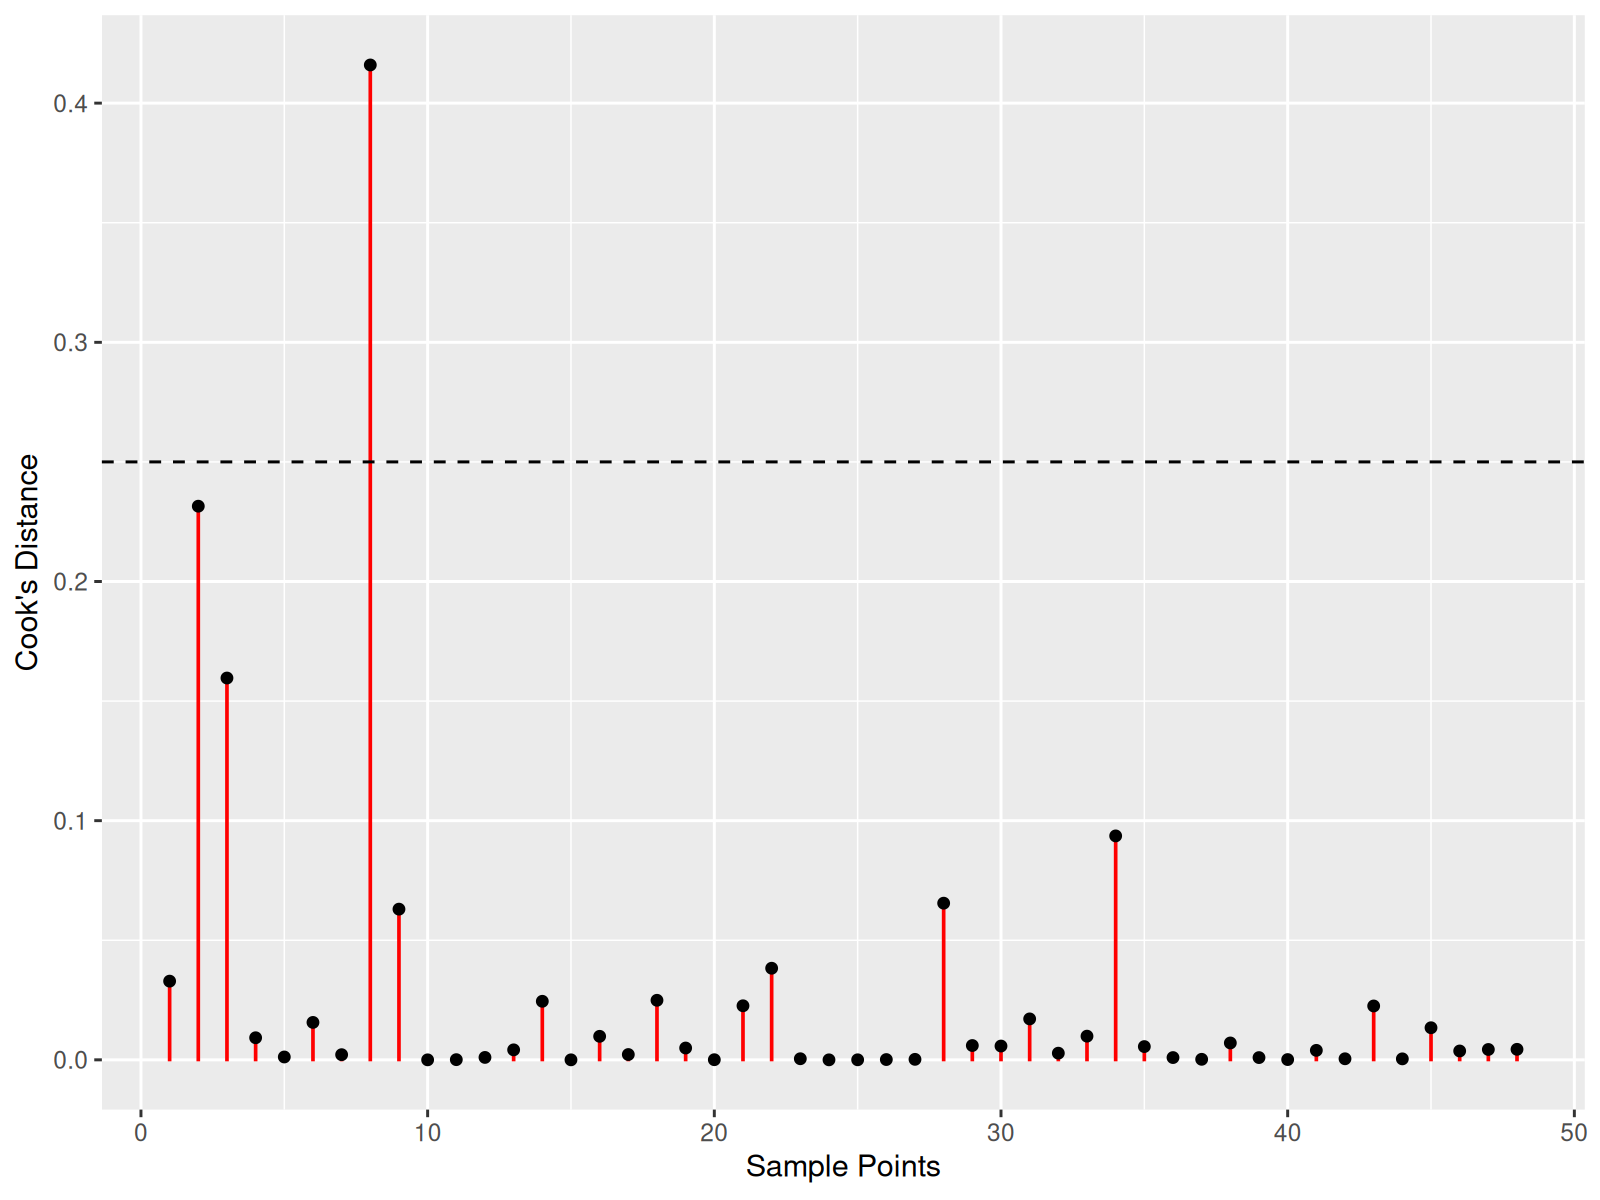

In [24]:
cooksD_values <- cooks.distance(lm_eff)
 
ggplot() + geom_col(aes(y = cooksD_values, x = 1:length(cooksD_values)), width = 0.025, col = 'red')  + 
    geom_point(aes(y = cooksD_values, x = 1:length(cooksD_values))) + xlab('Sample Points') + ylab("Cook's Distance") + 
    geom_hline(yintercept = 0.25, lty = 2)

In [25]:
df_eff %>% group_by(Brand, Temp, Stirred) %>% 
summarise('25%' = quantile(Time, probs = 0.25),
          'Mean' = mean(Time), 
          'Median' = median(Time),
          '75%' = quantile(Time, probs = 0.75),
          'Var' = var(Time), 
          'n' = n())

`summarise()` has grouped output by 'Brand', 'Temp'. You can override using the `.groups` argument.


Brand,Temp,Stirred,25%,Mean,Median,75%,Var,n
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
name,6,yes,75.83358,76.20241,75.89223,76.26107,0.45934925,4
name,6,no,78.79910,78.99061,79.04435,79.23586,0.41464405,4
name,23,yes,71.82180,72.69145,73.14894,74.01859,6.98690870,4
name,23,no,76.20492,76.36351,76.27622,76.43481,0.10781342,4
name,40,yes,64.87321,65.85343,65.43863,66.41886,2.54997510,4
name,40,no,70.28754,70.55511,70.50947,70.77705,0.25440333,4
store,6,yes,77.06561,77.33703,77.60659,77.87801,0.59648839,4
store,6,no,79.01994,79.49240,79.63219,80.10465,1.69425169,4
store,23,yes,66.08831,66.19126,66.22629,66.32923,0.04110242,4


In [27]:
names(summary(lm_eff))

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

1            2            3            4            5            6 
 1.013053058  2.687100652  2.231482570  0.536688665  0.193106668  0.698597400 
           7            8            9           10           11           12 
-0.259481472 -3.602078217 -1.401871770  0.002445435 -0.049533832  0.177320000 
          13           14           15           16           17           18 
-0.360886942  0.873816013  0.010070670  0.553868335 -0.263172003 -0.881212600 
          19           20           21           22           23           24 
-0.392684643  0.041161553 -0.839681470 -1.093002435  0.119599167  0.005295200 
          25           26           27           28           29           30 
 0.024032263 -0.061311368  0.080262040  1.429366058 -0.431998722 -0.424276777 
          31           32           33           34           35           36 
 0.730681593 -0.294559498 -0.555681920 -1.708950843  0.415853377  0.172136993 
          37           38           39           40           41           42 
 0.083437222  0.469134533 -0.171541560 -0.060296242 -0.351464892 -0.118090008 
          43           44           45           46           47           48 
-0.838151078 -0.113263667  0.646961440  0.339881028  0.367610237  0.370229792

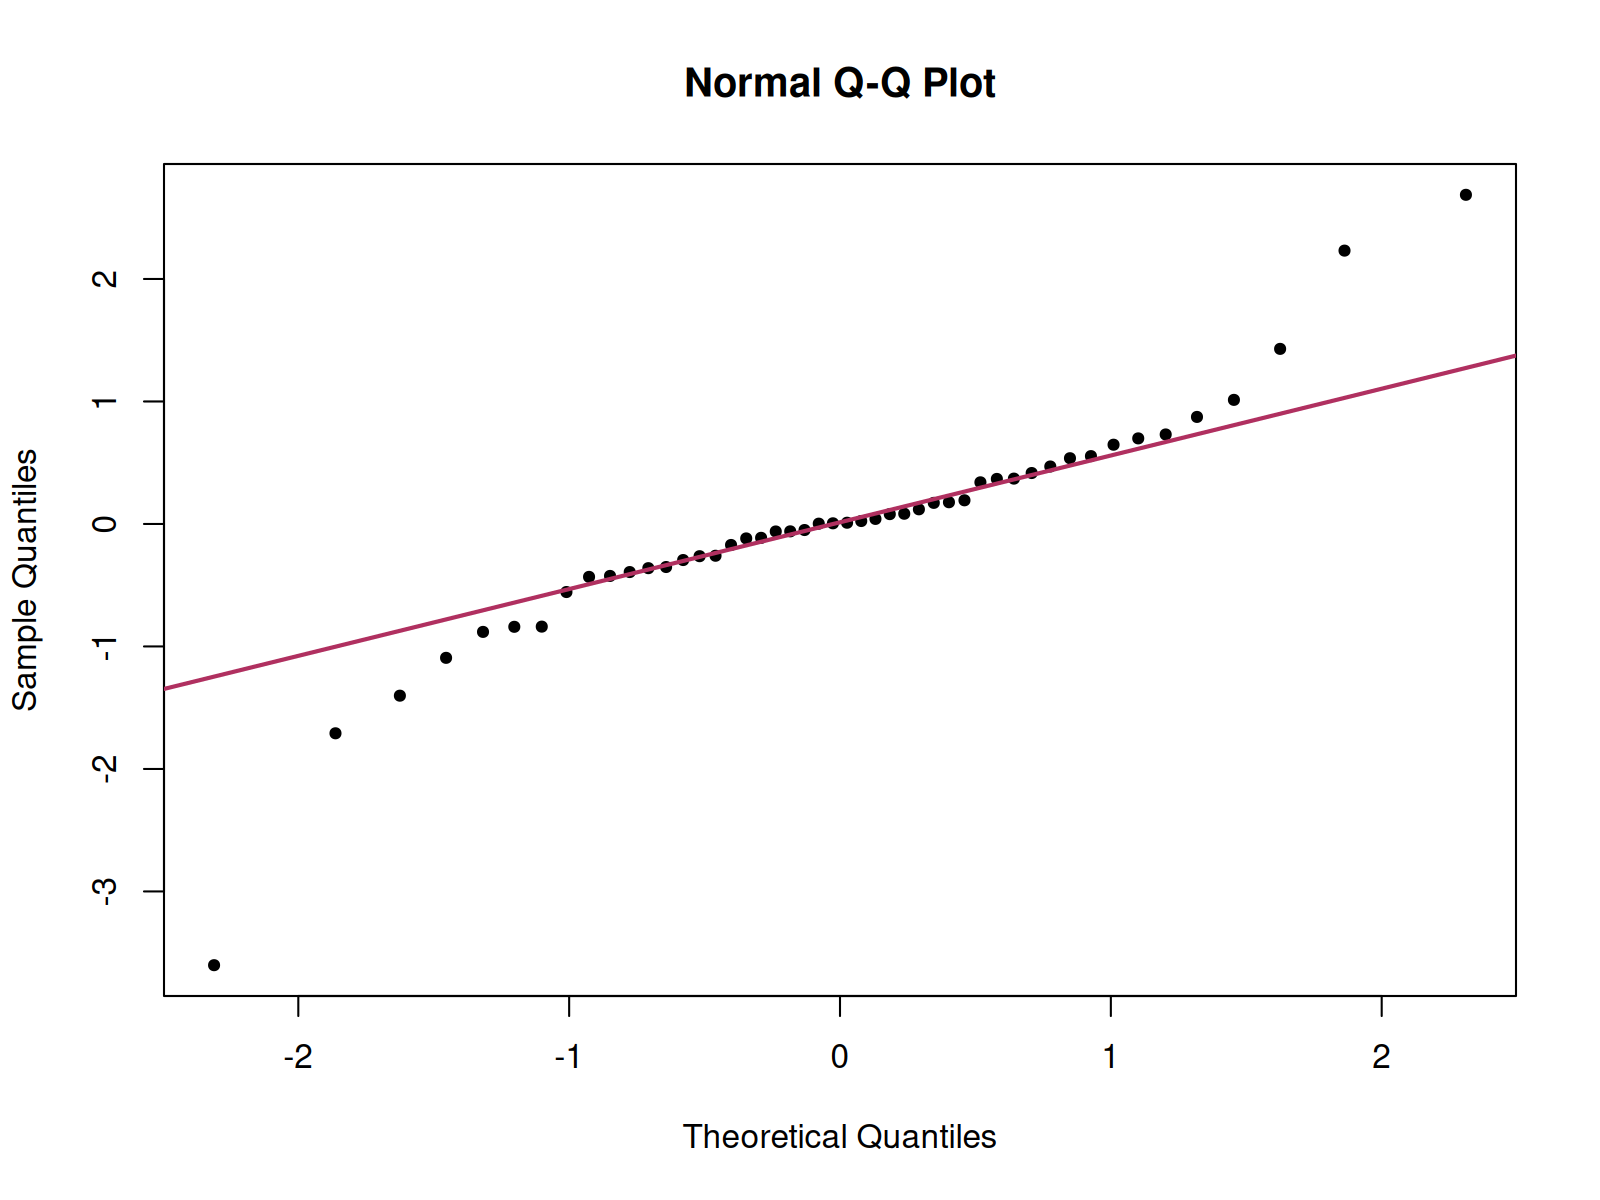

In [28]:
lm_eff$resid

qqnorm(lm_eff$resid, pch = 20)
qqline(lm_eff$resid, col = "maroon", lwd = 2)

In [29]:
shapiro.test(lm_eff$resid)


	Shapiro-Wilk normality test

data:  lm_eff$resid
W = 0.89335, p-value = 0.0003862


Warning message in plot.window(...):
“relative range of values (   0 * EPS) is small (axis 2)”


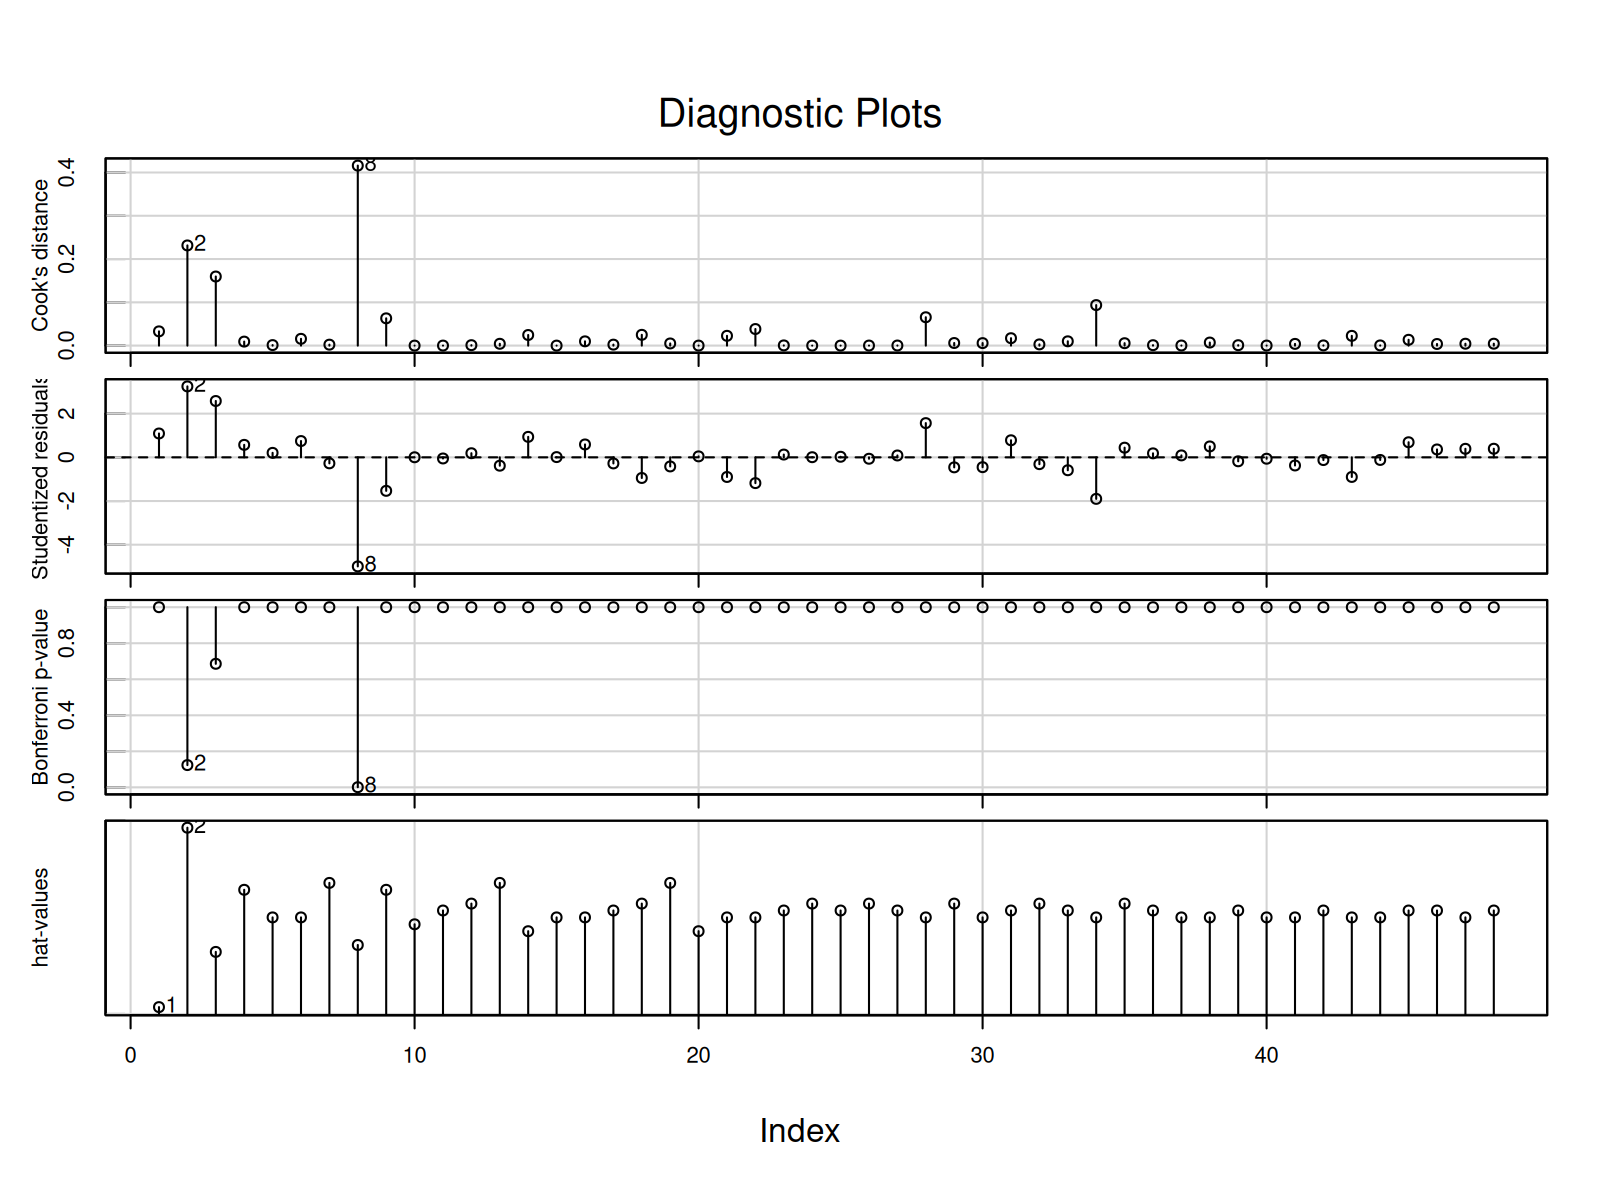

In [30]:
influenceIndexPlot(lm_eff)

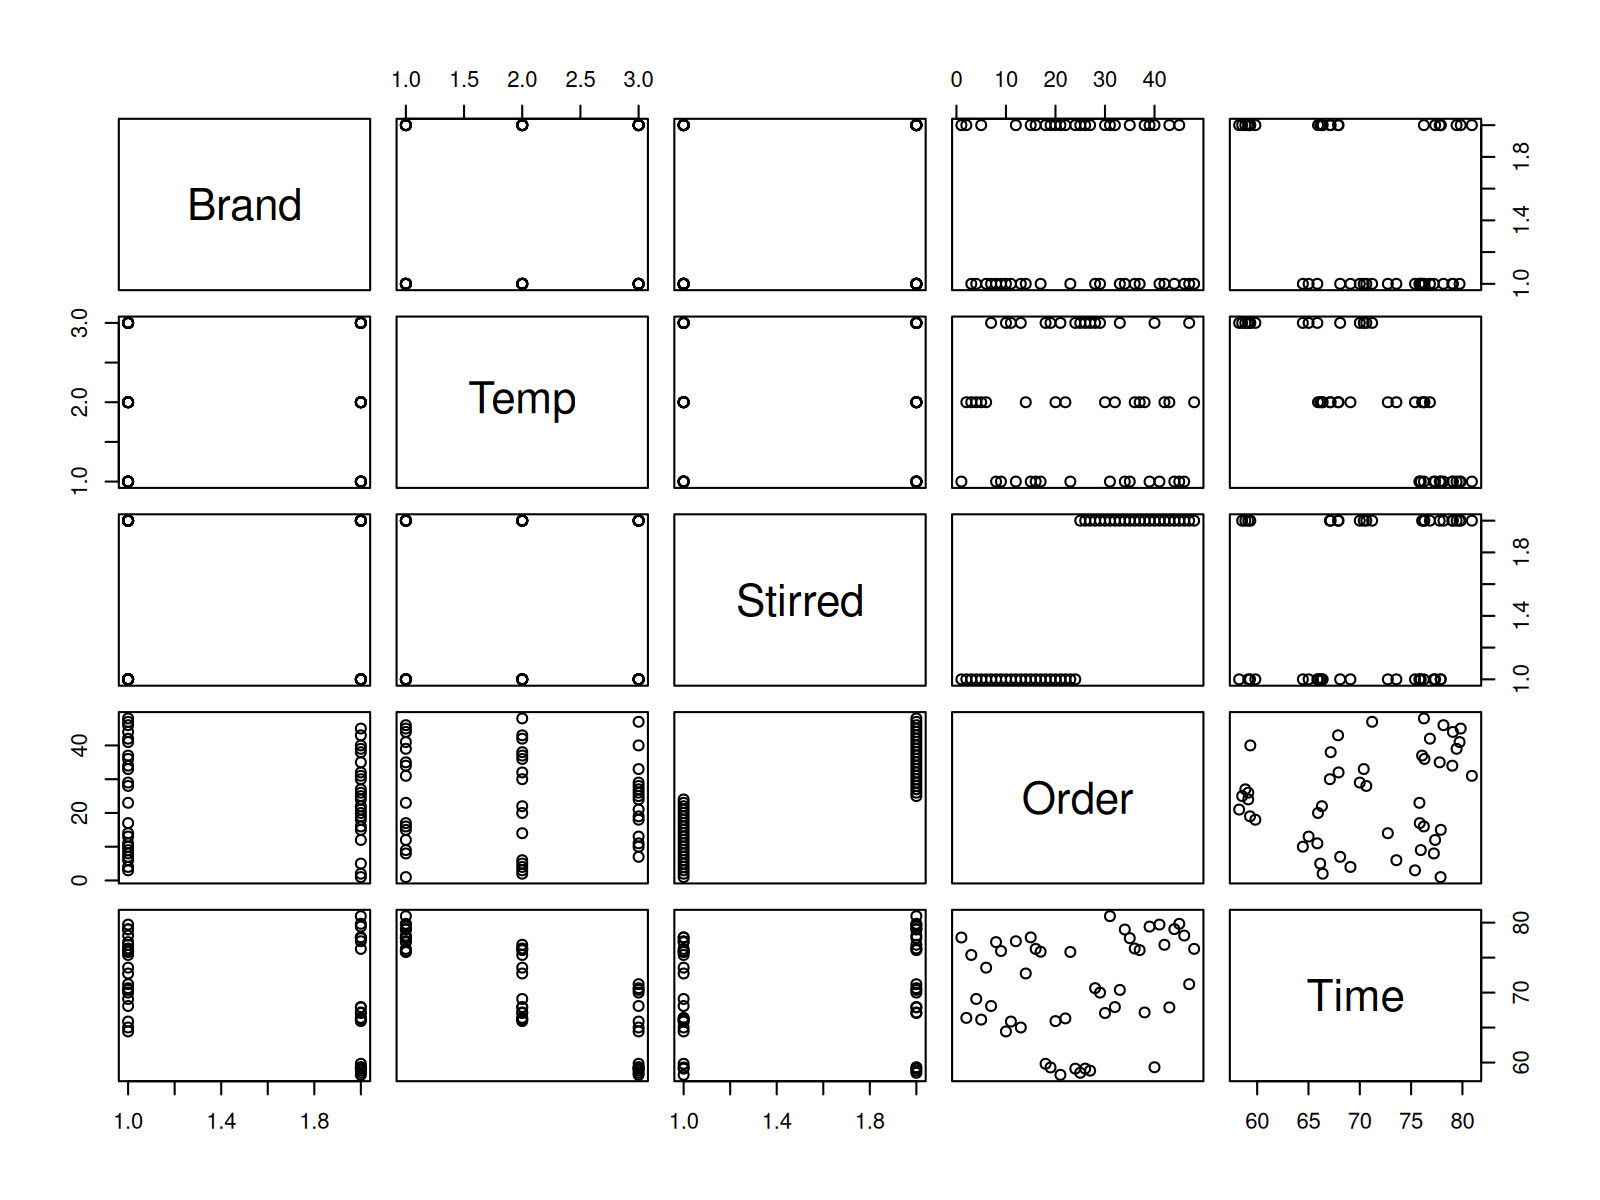

In [31]:
plot(df_eff)

In [32]:
df_eff %>% group_by(Brand, Temp) %>% summarise('Values' = list(Time))

`summarise()` has grouped output by 'Brand'. You can override using the `.groups` argument.


Brand,Temp,Values
<fct>,<fct>,<list>
name,6,"77.21547, 75.94293, 75.84153, 75.80973, 79.01465, 79.72130, 79.07405, 78.15246"
name,23,"75.37855, 69.08937, 73.56527, 72.73261, 76.30220, 76.06895, 76.83265, 76.25025"
name,40,"68.08492, 64.45156, 65.86350, 65.01375, 70.63538, 69.99943, 70.38357, 71.20208"
store,6,"77.87371, 77.33947, 77.89089, 76.24402, 80.92177, 77.78345, 79.43210, 79.83228"
store,23,"66.38436, 66.14172, 65.92809, 66.31086, 67.08353, 67.93138, 67.16406, 67.88313"
store,40,"59.82388, 59.30261, 58.24407, 59.13058, 58.53920, 59.13561, 58.84538, 59.33370"


In [33]:
library(lme4)
summary(lmer(Time ~ Brand + (1|Temp) + (1|Brand:Temp), data = df_eff))

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




Linear mixed model fit by REML ['lmerMod']
Formula: Time ~ Brand + (1 | Temp) + (1 | Brand:Temp)
   Data: df_eff

REML criterion at convergence: 210.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.94794 -0.48858  0.00233  0.74896  1.64953 

Random effects:
 Groups     Name        Variance Std.Dev.
 Brand:Temp (Intercept) 14.071   3.751   
 Temp       (Intercept) 44.465   6.668   
 Residual                3.361   1.833   
Number of obs: 48, groups:  Brand:Temp, 6; Temp, 3

Fixed effects:
            Estimate Std. Error t value
(Intercept)   73.443      4.433  16.567
Brandstore    -5.339      3.108  -1.718

Correlation of Fixed Effects:
           (Intr)
Brandstore -0.351

In [34]:
summary(aov_eff)

                   Df Sum Sq Mean Sq F value   Pr(>F)    
Brand               1  342.0   342.0 296.041  < 2e-16 ***
Temp                2 1654.7   827.4 716.169  < 2e-16 ***
Stirred             1   69.9    69.9  60.495 3.22e-09 ***
Brand:Temp          2  231.9   115.9 100.345 1.90e-15 ***
Brand:Stirred       1   20.5    20.5  17.753 0.000161 ***
Temp:Stirred        2    0.1     0.1   0.054 0.947535    
Brand:Temp:Stirred  2    9.1     4.5   3.919 0.028838 *  
Residuals          36   41.6     1.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$Model~1: Y_{ijkl} = \mu + \alpha_i + \beta_j + \gamma_k + (\alpha \beta)_{ij} + (\alpha \gamma)_{ik} + (\gamma \beta)_{jk} + (\alpha \beta \gamma)_{ijk} + \epsilon_{ijkl}$  
$Model~2: Y_{ijkl} = \mu + \alpha_i + \beta_j + \gamma_k + (\alpha \beta)_{ij} + \epsilon_{ijkl}$  
$Model~3: Y_{ijkl} = \mu + \alpha_i + \beta_j + \gamma_k + \epsilon_{ijkl}$ 

Where $\alpha$ is brand effect, $\beta$ is temperature effect, $\gamma$ is stir effect. i, j, k are (1, 2), (1,2,3), and (1,2), respectively. $\epsilon_{ijkl}$ is assumed to be normally distributed with a $\mu_\epsilon$ of 0 and a variance of $\sigma^2_\epsilon$. $\mu$ is the overall mean and is an unknown value.

Mixed Effects models:  
$Model~4: Y_{ijk} = \mu + \alpha_i + \beta_j + \gamma_k + (\alpha \beta)_{ij} + \epsilon_{ijk}$  
Where both temperature and brand are random.  
$Model~5: Y_{ijk} = \mu + A_i + \beta_j + \gamma_k + (A \beta)_{ij} + \epsilon_{ijk}$  
Where temperature is fixed and brand is random.  
$Model~6: Y_{ijk} = \mu + \alpha_i + B_j + \gamma_k + (\alpha B)_{ij} + \epsilon_{ijk}$  
Where temperature is random and brand is fixed.

With order as a factor:  
$Model~7: Y_{ijklm} = \mu + \alpha_i + \beta_j + \gamma_k + \nu_l + (\alpha \beta)_{ij} + (\alpha \gamma)_{ik} + (\gamma \beta)_{jk} + (\alpha \beta \gamma)_{ijk} + \epsilon_{ijklm}$  
Similar to model 1, but with an introduced effect, $\nu$ to represent order.

In [35]:
summary(lm_eff)$adj.r.squared
summary(lm_eff)$r.squared

[1] 0.9770873

[1] 0.9824498

In [36]:
aov_block_eff <- aov(lm_block_eff <- lm(Time ~ Brand * Temp + Stirred, data = df_eff))
aov_block_eff_noint <- aov(lm_block_eff <- lm(Time ~ Brand + Temp + Stirred, data = df_eff))
aov_block_order_eff <- aov(lm_block_order_eff <- lm(Time ~ Brand * Temp + Stirred + Order, data = df_eff))
aov_three_order_eff <- aov(lm_three_order_eff <- lm(Time ~ Brand * Temp * Stirred + Order, data = df_eff))

In [37]:
summary(lm_block_eff)$adj.r.squared
summary(lm_block_eff)$r.squared

[1] 0.860184

[1] 0.8720833

In [38]:
summary(lm_block_order_eff)$adj.r.squared
summary(lm_block_order_eff)$r.squared

[1] 0.966329

[1] 0.9713439

In [39]:
summary(lm_three_order_eff)$adj.r.squared
summary(lm_three_order_eff)$r.squared

[1] 0.9765706

[1] 0.9825525

In [40]:
df_aov <- aov_eff

sqrt(sum(df_aov$residuals^2)/36)

[1] 1.074835

In [48]:
RMSE_function <- function(df_aov){
    
    r_mse <- sqrt(sum(df_aov$residuals^2)/df_aov$df)
    
    r_s <- 1 - tail(summary(df_aov)[1][[1]][[2]], n = 1) / sum(summary(df_aov)[1][[1]][2])

    a_r_s <- 1 - (1 - r_s)*(nrow(df_aov$model) - 1)/(df_aov$df)
    
    aic_ <- AIC(df_aov)
    
    bic_ <- BIC(df_aov)
    
    output_stats <- c(
        r_mse,
        r_s,
        a_r_s,
        aic_,
        bic_
    )
    return(output_stats)
}

print(RMSE_function(aov_eff))
print(RMSE_function(aov_block_eff))
print(RMSE_function(aov_block_eff_noint))
print(RMSE_function(aov_block_order_eff))
print(RMSE_function(aov_three_order_eff))

[1]   1.0748350   0.9824498   0.9770873 155.3374101 179.6630232
[1]   1.3185414   0.9699208   0.9655190 171.1984162 186.1680243
[1]   2.6551070   0.8720833   0.8601840 236.6806137 247.9078198
[1]   1.3029610   0.9713439   0.9663290 170.8720441 187.7128532
[1]   1.0868873   0.9825525   0.9765706 157.0556795 183.2524936


In [42]:
knitr::kable(Anova(aov_eff, type=3),'simple', digits = 3)



                         Sum Sq   Df     F value   Pr(>F)
-------------------  ----------  ---  ----------  -------
(Intercept)           23227.231    1   20105.451    0.000
Brand                     2.575    1       2.229    0.144
Temp                    221.582    2      95.901    0.000
Stirred                  15.548    1      13.458    0.001
Brand:Temp               80.110    2      34.672    0.000
Brand:Stirred             0.400    1       0.347    0.560
Temp:Stirred              3.668    2       1.588    0.218
Brand:Temp:Stirred        9.056    2       3.919    0.029
Residuals                41.590   36          NA       NA

In [55]:
aov_reduced <- aov(lm_reduced <- lm(Time ~ Brand + Temp + Stirred + Brand:Temp + Brand:Temp:Stirred, df_eff))
print(RMSE_function(aov_reduced))

[1]   1.0748350   0.9824498   0.9770873 155.3374101 179.6630232


In [57]:
summary(lm_reduced)


Call:
lm(formula = Time ~ Brand + Temp + Stirred + Brand:Temp + Brand:Temp:Stirred, 
    data = df_eff)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6021 -0.3538  0.0077  0.3816  2.6871 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  76.2024     0.5374 141.794  < 2e-16 ***
Brandstore                    1.1346     0.7600   1.493  0.14419    
Temp23                       -3.5110     0.7600  -4.620 4.78e-05 ***
Temp40                      -10.3490     0.7600 -13.617 9.05e-16 ***
Stirredno                    -0.1618     0.7600  -0.213  0.83260    
Brandstore:Temp23            -7.6348     1.0748  -7.103 2.40e-08 ***
Brandstore:Temp40            -7.8628     1.0748  -7.315 1.27e-08 ***
Brandname:Temp6:Stirredno     2.9500     1.0748   2.745  0.00939 ** 
Brandstore:Temp6:Stirredno    2.3172     1.0748   2.156  0.03785 *  
Brandname:Temp23:Stirredno    3.8339     1.0748   3.567

In [59]:
summary(aov_reduced)

                   Df Sum Sq Mean Sq F value   Pr(>F)    
Brand               1  342.0   342.0  296.04  < 2e-16 ***
Temp                2 1654.7   827.4  716.17  < 2e-16 ***
Stirred             1   69.9    69.9   60.49 3.22e-09 ***
Brand:Temp          2  231.9   115.9  100.34 1.90e-15 ***
Brand:Temp:Stirred  5   29.7     5.9    5.14  0.00117 ** 
Residuals          36   41.6     1.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [60]:
summary(lm_eff)


Call:
lm(formula = Time ~ Brand * Temp * Stirred, data = df_eff)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6021 -0.3538  0.0077  0.3816  2.6871 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  76.2024     0.5374 141.794  < 2e-16 ***
Brandstore                    1.1346     0.7600   1.493 0.144185    
Temp23                       -3.5110     0.7600  -4.620 4.78e-05 ***
Temp40                      -10.3490     0.7600 -13.617 9.05e-16 ***
Stirredno                     2.7882     0.7600   3.669 0.000783 ***
Brandstore:Temp23            -7.6348     1.0748  -7.103 2.40e-08 ***
Brandstore:Temp40            -7.8628     1.0748  -7.315 1.27e-08 ***
Brandstore:Stirredno         -0.6328     1.0748  -0.589 0.559694    
Temp23:Stirredno              0.8839     1.0748   0.822 0.416308    
Temp40:Stirredno              1.9135     1.0748   1.780 0.083476 .  
Brandstore:Temp23:Stirredno  -1.7150     1.5200  -1.128 0.266685  

In [81]:
max(vif(aov_eff)[,3])
vif(aov_eff)

there are higher-order terms (interactions) in this model
consider setting terms = 'marginal' or 'high-order'; see ?vif



[1] 3

there are higher-order terms (interactions) in this model
consider setting terms = 'marginal' or 'high-order'; see ?vif



,GVIF,Df,GVIF^(1/(2*Df))
Brand,6,1,2.449490
Temp,16,2,2.000000
Stirred,6,1,2.449490
Brand:Temp,32,2,2.378414
Brand:Stirred,9,1,3.000000
Temp:Stirred,32,2,2.378414
Brand:Temp:Stirred,40,2,2.514867


In [66]:
dwtest(aov_eff) #Test for independence of errors
#H0: Uncorrelated errors
#Ha: correlation between errors


	Durbin-Watson test

data:  aov_eff
DW = 1.1535, p-value = 0.004873
alternative hypothesis: true autocorrelation is greater than 0


In [67]:
bptest(aov_eff) #Test for constant variance
#H0: Equal variance
#HA: Not equal variance


	studentized Breusch-Pagan test

data:  aov_eff
BP = 20.151, df = 11, p-value = 0.04331


In [97]:
df_eff %>% group_by(Brand, Temp, Stirred) %>% 
summarise('Min' = min(Time),
          '25%' = quantile(Time, probs = 0.25),
          'Mean' = mean(Time), 
          'Median' = median(Time),
          '75%' = quantile(Time, probs = 0.75),
          'Max' = max(Time),
          'Range' = Max - Min,
          'Var' = var(Time), 
          'n' = n())


`summarise()` has grouped output by 'Brand', 'Temp'. You can override using the `.groups` argument.


Brand,Temp,Stirred,Min,25%,Mean,Median,75%,Max,Range,Var,n
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
name,6,yes,75.80973,75.83358,76.20241,75.89223,76.26107,77.21547,1.4057377,0.45934925,4
name,6,no,78.15246,78.79910,78.99061,79.04435,79.23586,79.72130,1.5688327,0.41464405,4
name,23,yes,69.08937,71.82180,72.69145,73.14894,74.01859,75.37855,6.2891789,6.98690870,4
name,23,no,76.06895,76.20492,76.36351,76.27622,76.43481,76.83265,0.7636940,0.10781342,4
name,40,yes,64.45156,64.87321,65.85343,65.43863,66.41886,68.08492,3.6333543,2.54997510,4
name,40,no,69.99943,70.28754,70.55511,70.50947,70.77705,71.20208,1.2026434,0.25440333,4
store,6,yes,76.24402,77.06561,77.33703,77.60659,77.87801,77.89089,1.6468708,0.59648839,4
store,6,no,77.78345,79.01994,79.49240,79.63219,80.10465,80.92177,3.1383169,1.69425169,4
store,23,yes,65.92809,66.08831,66.19126,66.22629,66.32923,66.38436,0.4562787,0.04110242,4


In [100]:
df_eff %>% group_by(Temp) %>% 
summarise('Min' = min(Time),
          '25%' = quantile(Time, probs = 0.25),
          'Mean' = mean(Time), 
          'Median' = median(Time),
          '75%' = quantile(Time, probs = 0.75),
          'Max' = max(Time),
          'Range' = Max - Min,
          'Var' = var(Time), 
          'n' = n())

df_eff %>% group_by(Brand) %>% 
summarise('Min' = min(Time),
          '25%' = quantile(Time, probs = 0.25),
          'Mean' = mean(Time), 
          'Median' = median(Time),
          '75%' = quantile(Time, probs = 0.75),
          'Max' = max(Time),
          'Range' = Max - Min,
          'Var' = var(Time), 
          'n' = n())

df_eff %>% group_by(Stirred) %>% 
summarise('Min' = min(Time),
          '25%' = quantile(Time, probs = 0.25),
          'Mean' = mean(Time), 
          'Median' = median(Time),
          '75%' = quantile(Time, probs = 0.75),
          'Max' = max(Time),
          'Range' = Max - Min,
          'Var' = var(Time), 
          'n' = n())

Temp,Min,25%,Mean,Median,75%,Max,Range,Var,n
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
6,75.80973,76.97261,78.00561,77.88230,79.16356,80.92177,5.112037,2.467426,16
23,65.92809,66.90874,70.69044,68.51038,75.55115,76.83265,10.904559,19.204515,16
40,58.24407,59.13435,63.62433,62.13772,68.56355,71.20208,12.958001,25.996561,16


Brand,Min,25%,Mean,Median,75%,Max,Range,Var,n
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
name,64.45156,70.28754,73.44276,75.59414,76.43481,79.72130,15.26973,21.13144,24
store,58.24407,59.32593,68.10416,66.73395,77.45047,80.92177,22.67769,67.03190,24


Stirred,Min,25%,Mean,Median,75%,Max,Range,Var,n
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
yes,58.24407,65.65107,69.56681,68.58714,75.86688,77.89089,19.64682,44.63986,24
no,58.53920,67.70337,71.98011,73.63551,78.36801,80.92177,22.38257,55.35476,24
